# **Análisis Exploratorio de Datos (EDA)**

## **Librerías y modulos necesarios**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
from IPython.display import display
from statsmodels.tsa.seasonal import seasonal_decompose
import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor
from windrose import WindroseAxes
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from itertools import product
import warnings
warnings.filterwarnings("ignore")

## **Contextualización de los datos**

## **Conjunto de datos**

In [3]:
file_path = r'C:\Users\kamac\OneDrive\Desktop\MachineLearningUN\DATA.xlsx'
data = pd.read_excel(file_path)

In [4]:
data.head()

SoftwareVersion  buildbuiltbyCIserver20210728  VarName3  VarName4  \
0  2022-01-01 00:00:00                     16.060860  0.958639  13.15692   
1  2022-01-01 00:10:00                     16.156927  0.885824  13.48116   
2  2022-01-01 00:20:00                     16.473571  0.911763  13.48116   
3  2022-01-01 00:30:00                     16.660009  0.860070  14.31492   
4  2022-01-01 00:40:00                     16.519613  0.903333  13.89804   

   VarName5   VarName6   VarName7  VarName8  VarName9  VarName10  ...  \
0  18.76164  18.468434  15.830104  0.959005  12.85460   18.23426  ...   
1  18.06684  17.850526  15.972642  0.891046  13.59028   18.41818  ...   
2  18.48372  18.298440  16.287375  0.914220  13.49832   18.37220  ...   
3  19.27116  18.931634  16.451707  0.842721  13.77420   18.69406  ...   
4  19.31748  18.561074  16.353678  0.889667  13.63626   19.15386  ...   

   VarName51  VarName52  VarName53  VarName54  VarName55  VarName56  \
0        0.0        0.0        0.0   0.000076      61.08       3.08   
1        0.0        0.0        0.0   0.000076      61.08       2.83   
2        0.0        0.0        0.0   0.000076      60.42       2.74   
3        0.0        0.0        0.0   0.000000      60.88       2.83   
4        0.0        0.0        0.0   0.000076      59.99       2.59   

   VarName57  VarName58  VarName59  VarName60  
0      143.8      61.21       3.39      143.8  
1      143.8      61.49       3.36      143.8  
2      143.8      60.65       3.11      143.8  
3      143.8      61.19       3.16      143.8  
4      143.8      60.26       3.21      143.8  

[5 rows x 60 columns]

In [5]:
data.shape

(38448, 60)

Nótese que la base de datos contiene **60** variables y **38448** observaciones.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38448 entries, 0 to 38447
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SoftwareVersion               38448 non-null  object 
 1   buildbuiltbyCIserver20210728  38448 non-null  float64
 2   VarName3                      38448 non-null  float64
 3   VarName4                      38448 non-null  float64
 4   VarName5                      38448 non-null  float64
 5   VarName6                      38448 non-null  float64
 6   VarName7                      38448 non-null  float64
 7   VarName8                      38448 non-null  float64
 8   VarName9                      38448 non-null  float64
 9   VarName10                     38448 non-null  float64
 10  VarName11                     38448 non-null  float64
 11  VarName12                     38448 non-null  float64
 12  VarName13                     38448 non-null  float64
 13  V

## **Reorganización del conjunto de datos**

Dado a la naturaleza de los datos previamente vista, se tomó la decisión de dividir y reorganizar la base de datos en subconjuntos correspondientes a distintas partes y características de esta; permitiendo así un mejor manejo de los datos a modelar. También se convierte la columna `SoftwareVersion` en formato de fecha utilizando datetime para facilitar el análisis temporal de los datos.

In [7]:
data.rename(columns = {'buildbuiltbyCIserver20210728': 'VarName2'}, inplace = True)
data['Fecha'] = pd.to_datetime(data['SoftwareVersion'])
subconjuntos = {
    'Wind speed 100 m (sensor 1)': ['VarName2', 'VarName3', 'VarName4', 'VarName5', 'VarName6'],
    'Wind speed 100 m (sensor 2)': ['VarName7', 'VarName8', 'VarName9', 'VarName10', 'VarName11'],
    'Wind speed 80 m (sensor 1)': ['VarName12', 'VarName13', 'VarName14', 'VarName15', 'VarName16'],
    'Wind speed 80 m (sensor 2)': ['VarName17', 'VarName18', 'VarName19', 'VarName20', 'VarName21'],
    'Wind speed 60 m': ['VarName22', 'VarName23', 'VarName24', 'VarName25', 'VarName26'],
    'Wind speed 40 m': ['VarName27', 'VarName28', 'VarName29', 'VarName30', 'VarName31'],
    'Wind direction 60 m': ['VarName32', 'VarName33', 'VarName34'],
    'Presión': ['VarName35', 'VarName36', 'VarName37', 'VarName38'],
    'Humedad': ['VarName39', 'VarName40', 'VarName41', 'VarName42'],
    'Temperature': ['VarName43', 'VarName44', 'VarName45', 'VarName46', 'VarName47', 'VarName48', 'VarName49', 'VarName50'],
    'Canal vacío': ['VarName51', 'VarName52', 'VarName53', 'VarName54'],
    'Wind direction 100 m': ['VarName55', 'VarName56', 'VarName57'],
    'Wind direction 80 m': ['VarName58', 'VarName59', 'VarName60']
}

subdatasets = {nombre: data[variables] for nombre, variables in subconjuntos.items()}

Así se verían los subconjuntos: 
| Wind speed 100 m (sensor 1) | Wind speed 100 m (sensor 2) | Wind speed 80 m (sensor 1) | Wind speed 80 m (sensor 2) | Wind speed 60 m | Wind speed 40 m | Wind direction 60 m | Wind direction 100 m | Wind direction 80 m | Presión  | Humedad | Temperature | Canal vacío |
|-----------------------------|-----------------------------|----------------------------|----------------------------|-----------------|-----------------|----------------------|----------------------|----------------------|----------|---------|-------------|-------------|
| VarName2                    | VarName7                    | VarName12                  | VarName17                  | VarName22       | VarName27       | VarName32             | VarName55             | VarName58             | VarName35 | VarName39 | VarName43   | VarName51   |
| VarName3                    | VarName8                    | VarName13                  | VarName18                  | VarName23       | VarName28       | VarName33             | VarName56             | VarName59             | VarName36 | VarName40 | VarName44   | VarName52   |
| VarName4                    | VarName9                    | VarName14                  | VarName19                  | VarName24       | VarName29       | VarName34             | VarName57             | VarName60             | VarName37 | VarName41 | VarName45   | VarName53   |
| VarName5                    | VarName10                   | VarName15                  | VarName20                  | VarName25       | VarName30       |                      |                      |                      | VarName38 | VarName42 | VarName46   | VarName54   |
| VarName6                    | VarName11                   | VarName16                  | VarName21                  | VarName26       | VarName31       |                      |                      |                      |          |         | VarName47   |             |
|                             |                             |                            |                            |                 |                 |                      |                      |                      |          |         | VarName48   |             |
|                             |                             |                            |                            |                 |                 |                      |                      |                      |          |         | VarName49   |             |
|                             |                             |                            |                            |                 |                 |                      |                      |                      |          |         | VarName50   |             |


## **Reducción de Dimensionalidad (VIF)**

La reducción de dimensionalidad es una técnica crucial en el análisis de datos, especialmente cuando se trabaja con conjuntos de datos de alta dimensión que pueden contener información redundante o colineal. Uno de los métodos más utilizados para este propósito es la eliminación basada en el **Factor de Inflación de Varianza** (VIF, por sus siglas en inglés). El VIF mide cuánto la varianza de un coeficiente de regresión estimado se incrementa debido a la colinealidad entre las variables predictoras. Valores altos de VIF (por encima de 10) indican que la multicolinealidad es un problema y que la variable asociada debe ser considerada para su eliminación del modelo para reducir el sesgo y mejorar la interpretabilidad del modelo (Kutner et al., 2004).

En este proceso, se define una función `eliminar_vif_alto()` que recursivamente elimina las variables con un VIF más alto que un umbral predefinido, en este caso, 10.0. Este umbral se selecciona generalmente como una guía práctica para identificar colinealidad potencialmente peligrosa que podría distorsionar los resultados del análisis de regresión (Gujarati, 2009). A través de un bucle iterativo, la función calcula el VIF para todas las variables en el DataFrame de entrada, identifica la variable con el VIF más alto y la elimina. Este proceso se repite hasta que todas las variables restantes tengan un VIF dentro del umbral aceptable.

Una vez definida la función, se aplica a varios subconjuntos de datos para eliminar la multicolinealidad. Como resultado, obtenemos subconjuntos reformados donde cada uno contiene solo las variables que son menos colineales, lo que facilita un análisis de datos más preciso y confiable. La eliminación de variables redundantes también ayuda a mejorar la eficiencia computacional y a prevenir el sobreajuste, lo cual es esencial para obtener modelos predictivos robustos y generalizables.


In [6]:
def eliminar_vif_alto(df, threshold = 10.0):
    # Imprimir variables y VIF iniciales
    print("Variables iniciales y VIFs:")
    vif_data_inicial = pd.DataFrame()
    vif_data_inicial["Variable"] = df.columns
    vif_data_inicial["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    display(vif_data_inicial)  # Mostrar el DataFrame inicial con los VIFs

    # Proceso de eliminación de variables con VIF alto
    while True:
        # Calcula el VIF para todas las variables en el DataFrame
        vif_data = pd.DataFrame()
        vif_data["Variable"] = df.columns
        vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

        # Encuentra la variable con el VIF más alto
        max_vif = vif_data['VIF'].max()

        # Si el VIF más alto es menor o igual al umbral, romper el ciclo
        if max_vif <= threshold:
            break

        # Identifica la variable con el VIF más alto y eliminarla
        max_vif_variable = vif_data.loc[vif_data['VIF'].idxmax(), 'Variable']
        df = df.drop(columns=[max_vif_variable])
    
    # Imprimir variables y VIF finales
    print("Variables finales y VIFs:")
    vif_data_final = pd.DataFrame()
    vif_data_final["Variable"] = df.columns
    vif_data_final["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    display(vif_data_final)  # Mostrar el DataFrame final con los VIFs

    return df

# Procesar los subconjuntos de datos
subdatasets_reformados = {}  

for nombre, df in subdatasets.items():
    print(f"\nConjunto: '{nombre}'")
    df_reducido = eliminar_vif_alto(df)
    subdatasets_reformados[nombre] = df_reducido  



Conjunto: 'Wind speed 100 m (sensor 1)'
Variables iniciales y VIFs:


Variable           VIF
0  VarName2   2291.736117
1  VarName3     87.957520
2  VarName4    642.533095
3  VarName5  17260.886568
4  VarName6  20079.885032

Variables finales y VIFs:


Variable       VIF
0  VarName3  8.498604
1  VarName4  8.498604


Conjunto: 'Wind speed 100 m (sensor 2)'
Variables iniciales y VIFs:


Variable           VIF
0   VarName7   2280.024973
1   VarName8     89.836652
2   VarName9    627.732951
3  VarName10  17451.161077
4  VarName11  20226.815471

Variables finales y VIFs:


Variable       VIF
0  VarName8  8.550307
1  VarName9  8.550307


Conjunto: 'Wind speed 80 m (sensor 1)'
Variables iniciales y VIFs:


Variable           VIF
0  VarName12    802.876908
1  VarName13     31.096841
2  VarName14    319.375320
3  VarName15  14274.108227
4  VarName16  15227.429695

Variables finales y VIFs:


Variable       VIF
0  VarName13  5.022897
1  VarName14  5.022897


Conjunto: 'Wind speed 80 m (sensor 2)'
Variables iniciales y VIFs:


Variable           VIF
0  VarName17   1049.923158
1  VarName18     33.233140
2  VarName19    292.416163
3  VarName20  14177.936294
4  VarName21  15614.989445

Variables finales y VIFs:


Variable       VIF
0  VarName18  4.333816
1  VarName19  4.333816


Conjunto: 'Wind speed 60 m'
Variables iniciales y VIFs:


Variable           VIF
0  VarName22    925.291857
1  VarName23     37.699615
2  VarName24    254.590939
3  VarName25  12165.431088
4  VarName26  13329.097312

Variables finales y VIFs:


Variable       VIF
0  VarName23  4.972137
1  VarName24  4.972137


Conjunto: 'Wind speed 40 m'
Variables iniciales y VIFs:


Variable           VIF
0  VarName27    642.536672
1  VarName28     42.988817
2  VarName29    200.923925
3  VarName30   9383.197647
4  VarName31  10143.591044

Variables finales y VIFs:


Variable       VIF
0  VarName28  5.621536
1  VarName29  5.621536


Conjunto: 'Wind direction 60 m'
Variables iniciales y VIFs:


Variable       VIF
0  VarName32  3.348355
1  VarName33  2.365891
2  VarName34  3.898307

Variables finales y VIFs:


Variable       VIF
0  VarName32  3.348355
1  VarName33  2.365891
2  VarName34  3.898307


Conjunto: 'Presión'
Variables iniciales y VIFs:


Variable            VIF
0  VarName35  176374.244739
1  VarName36       5.452265
2  VarName37  211366.968721
3  VarName38  114438.452324

Variables finales y VIFs:


Variable       VIF
0  VarName35  1.003174
1  VarName36  1.003174


Conjunto: 'Humedad'
Variables iniciales y VIFs:


Variable          VIF
0  VarName39  2151.399503
1  VarName40    16.957309
2  VarName41  3118.283395
3  VarName42   726.845593

Variables finales y VIFs:


Variable       VIF
0  VarName39  1.009959
1  VarName40  1.009959


Conjunto: 'Temperature'
Variables iniciales y VIFs:


Variable           VIF
0  VarName43    740.950812
1  VarName44     25.877133
2  VarName45   1309.893163
3  VarName46    369.303605
4  VarName47  14061.751521
5  VarName48     12.276590
6  VarName49  20310.535995
7  VarName50  10206.541062

Variables finales y VIFs:


Variable       VIF
0  VarName43  1.265405
1  VarName44  1.024404
2  VarName47  1.297925
3  VarName48  1.023865


Conjunto: 'Canal vacío'
Variables iniciales y VIFs:


Variable        VIF
0  VarName51  36.940124
1  VarName52  38.503121
2  VarName53  37.388791
3  VarName54  39.818795

Variables finales y VIFs:


Variable       VIF
0  VarName52  1.003042
1  VarName53  1.003042


Conjunto: 'Wind direction 100 m'
Variables iniciales y VIFs:


Variable       VIF
0  VarName55  1.017947
1  VarName56  1.017947
2  VarName57  3.420726

Variables finales y VIFs:


Variable       VIF
0  VarName55  1.017947
1  VarName56  1.017947
2  VarName57  3.420726


Conjunto: 'Wind direction 80 m'
Variables iniciales y VIFs:


Variable       VIF
0  VarName58  1.047045
1  VarName59  1.047045
2  VarName60  3.843550

Variables finales y VIFs:


Variable       VIF
0  VarName58  1.047045
1  VarName59  1.047045
2  VarName60  3.843550

## **Preparación y Análisis de Subconjuntos de Velocidad del Viento**

Para optimizar los conjuntos de datos y eliminar variables redundantes que podrían introducir colinealidad en los análisis posteriores, implementamos una función para eliminar variables con un **Factor de Inflación de Varianza (VIF)** alto. Esta función identifica y elimina iterativamente las variables cuyo VIF excede un umbral de 10, asegurando que solo se conserven las variables más relevantes y que no estén altamente correlacionadas.

Finalmente, visualizamos los datos de cada subconjunto después de la reducción de dimensionalidad. Para ello, se crearon gráficos de líneas que representan las diferentes variables de velocidad del viento, permitiendo una comparación visual clara de su comportamiento en el tiempo. Estos gráficos, organizados en un formato de subgráficos, proporcionan una visión general de las tendencias y patrones para cada sensor y altura, facilitando la interpretación de los datos y los efectos de la reducción dimensional aplicada.

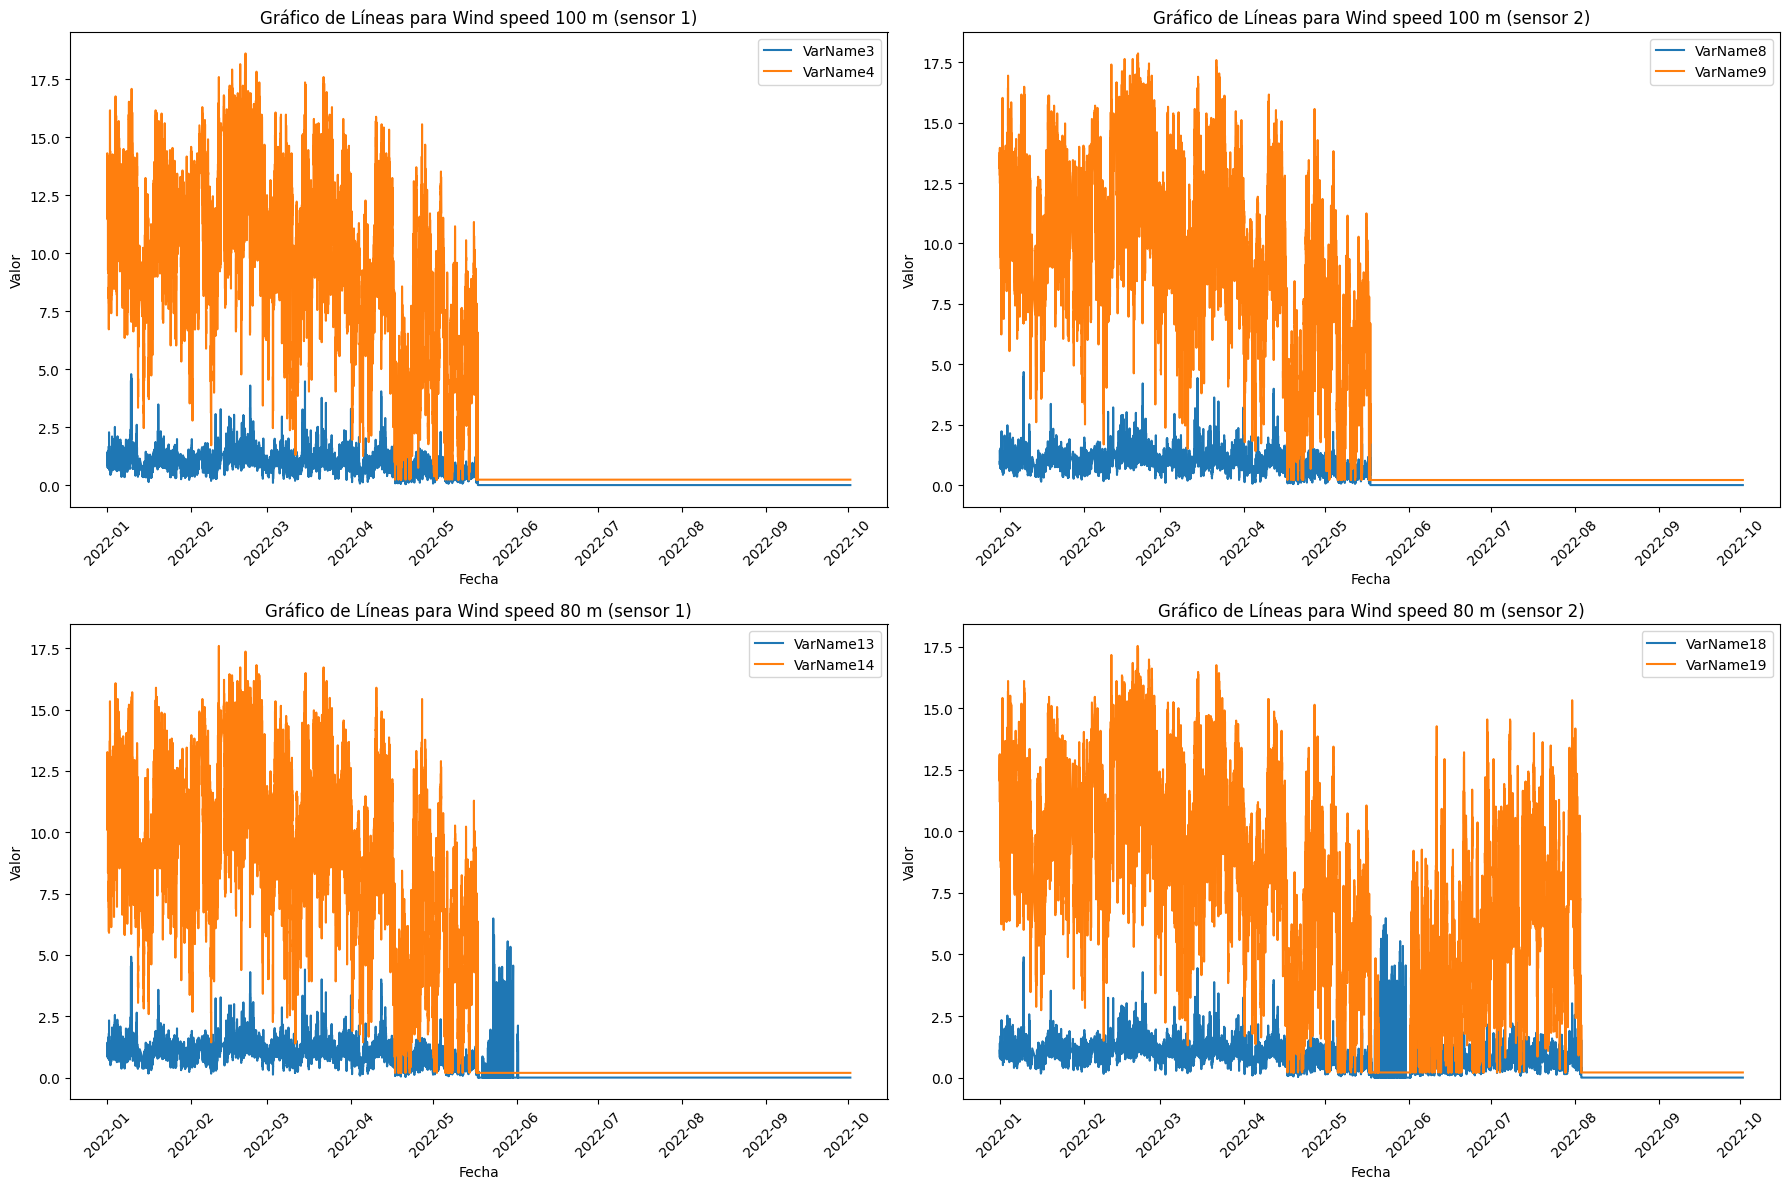

In [8]:
# Convertir la columna de fechas a formato datetime
data['Fecha'] = pd.to_datetime(data['SoftwareVersion'])

# Definir los subconjuntos de datos
sub_speed = {
    'Wind speed 100 m (sensor 1)': ['VarName3', 'VarName4', 'VarName5', 'VarName6'],
    'Wind speed 100 m (sensor 2)': ['VarName7', 'VarName8', 'VarName9', 'VarName10', 'VarName11'],
    'Wind speed 80 m (sensor 1)': ['VarName12', 'VarName13', 'VarName14', 'VarName15', 'VarName16'],
    'Wind speed 80 m (sensor 2)': ['VarName17', 'VarName18', 'VarName19', 'VarName20', 'VarName21'],
    'Wind speed 60 m': ['VarName22', 'VarName23', 'VarName24', 'VarName25', 'VarName26'],
    'Wind speed 40 m': ['VarName27', 'VarName28', 'VarName29', 'VarName30', 'VarName31']
}

# Crear los subconjuntos de datos incluyendo la columna de fechas
speed = {nombre: data[['Fecha'] + variables] for nombre, variables in sub_speed.items()}

# Definir la función para eliminar variables con VIF alto
def eliminar_vif_alto(df, threshold=10.0):
    df_vif = df.drop(columns=['Fecha'])  # Excluir la columna de fechas para calcular el VIF
    
    # Asegurarse de que todas las columnas sean numéricas
    df_vif = df_vif.apply(pd.to_numeric, errors='coerce').dropna(axis=1)
    
    while True:
        vif_data = pd.DataFrame()
        vif_data["Variable"] = df_vif.columns
        vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
        
        max_vif = vif_data['VIF'].max()
        
        if max_vif <= threshold:
            break
        
        max_vif_variable = vif_data.loc[vif_data['VIF'].idxmax(), 'Variable']
        df_vif = df_vif.drop(columns=[max_vif_variable])
    
    return df[['Fecha'] + df_vif.columns.tolist()]  # Retornar el DataFrame con la columna de fechas incluida

# Aplicar la función de eliminación de VIF a cada subconjunto
subdatasets_reducidos = {nombre: eliminar_vif_alto(df) for nombre, df in speed.items()}

# Configurar la figura para subgráficos
fig, axs = plt.subplots(2, 2, figsize=(18, 12))  # Crear un grid de 2x2 para 4 gráficos
axs = axs.flatten()  # Aplanar la lista de ejes para un acceso más fácil

# Crear gráficos de líneas para cada subconjunto después del VIF
for i, (nombre, df_reducido) in enumerate(subdatasets_reducidos.items()):
    if i >= 4:  # Limitar a 4 subgráficos
        break
    
    ax = axs[i]
    for column in df_reducido.columns[1:]:  # Excluir la columna de fechas del bucle
        ax.plot(df_reducido['Fecha'], df_reducido[column], label=column)
    
    ax.set_title(f'Gráfico de Líneas para {nombre}')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Valor')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()  # Asegurarse de que los subgráficos no se solapen
plt.show()


Las gráficas de líneas muestran la variación de la velocidad del viento a diferentes alturas (100 m y 80 m) y con diferentes sensores (sensor 1 y sensor 2). Observamos que:

1. **Wind speed 100 m (sensor 1 y sensor 2):** Las dos primeras gráficas indican una alta variabilidad en la velocidad del viento durante los primeros meses del año. A partir de mayo, la variabilidad disminuye abruptamente, lo que puede sugerir un cambio en las condiciones de medición o una posible pérdida de datos.

2. **Wind speed 80 m (sensor 1 y sensor 2):** Las gráficas muestran un patrón similar al de 100 m. La velocidad del viento varía significativamente hasta alrededor de mayo. Posteriormente, hay una caída marcada en la variabilidad, especialmente notable en el sensor 1, mientras que el sensor 2 aún presenta cierta actividad.

En general, la alta variabilidad inicial y la posterior estabilización pueden reflejar tanto fenómenos naturales como problemas de registro o cambios en la configuración de los sensores. Es crucial investigar la causa de la pérdida de variabilidad en la segunda mitad del año para asegurar la integridad de los datos.

## **Visualización de la Dirección y Velocidad del Viento en Diferentes Alturas**

Para comprender la relación entre la dirección del viento y su velocidad a diferentes alturas, se presentan gráficos de "Rosa de los Vientos" para alturas de 100 m, 80 m y 60 m. Las "Rosas de los Vientos" son herramientas visuales utilizadas en meteorología y estudios ambientales para mostrar la distribución de las velocidades del viento según su dirección de origen. Este enfoque proporciona una representación clara de cómo varían tanto la dirección como la intensidad del viento en diferentes alturas, lo cual es esencial para el análisis de la dinámica atmosférica y aplicaciones como la evaluación del potencial eólico para la generación de energía.

En esta sección, se han creado tres subgráficos utilizando configuraciones específicas para cada altura. Para cada uno, se han seleccionado columnas específicas del conjunto de datos que representan la dirección del viento (`direccion_viento`) y la velocidad del viento (`velocidad_viento`), y se han procesado para eliminar valores faltantes o no numéricos. La primera gráfica muestra la "Rosa de los Vientos" para la dirección y velocidad del viento a 100 m, proporcionando una vista general del comportamiento del viento a esta altura. La segunda y tercera gráfica ilustran de manera similar las distribuciones de viento a 80 m y 60 m, respectivamente.

Cada subgráfico ha sido configurado para mostrar la proporción de tiempo que el viento sopla desde diferentes direcciones y con diferentes intensidades, utilizando un enfoque de visualización consistente para facilitar la comparación entre las diferentes alturas. Al normalizar las frecuencias de las barras (`normed=True`) y usar un esquema de color claro con borde blanco (`edgecolor='white'`), se garantiza una interpretación visual clara y precisa de los datos. Esta técnica es valiosa en el análisis ambiental y meteorológico, ya que permite a los investigadores y analistas identificar patrones predominantes de viento y comprender mejor los comportamientos atmosféricos locales (Wilks, 2011; Stull, 2015).

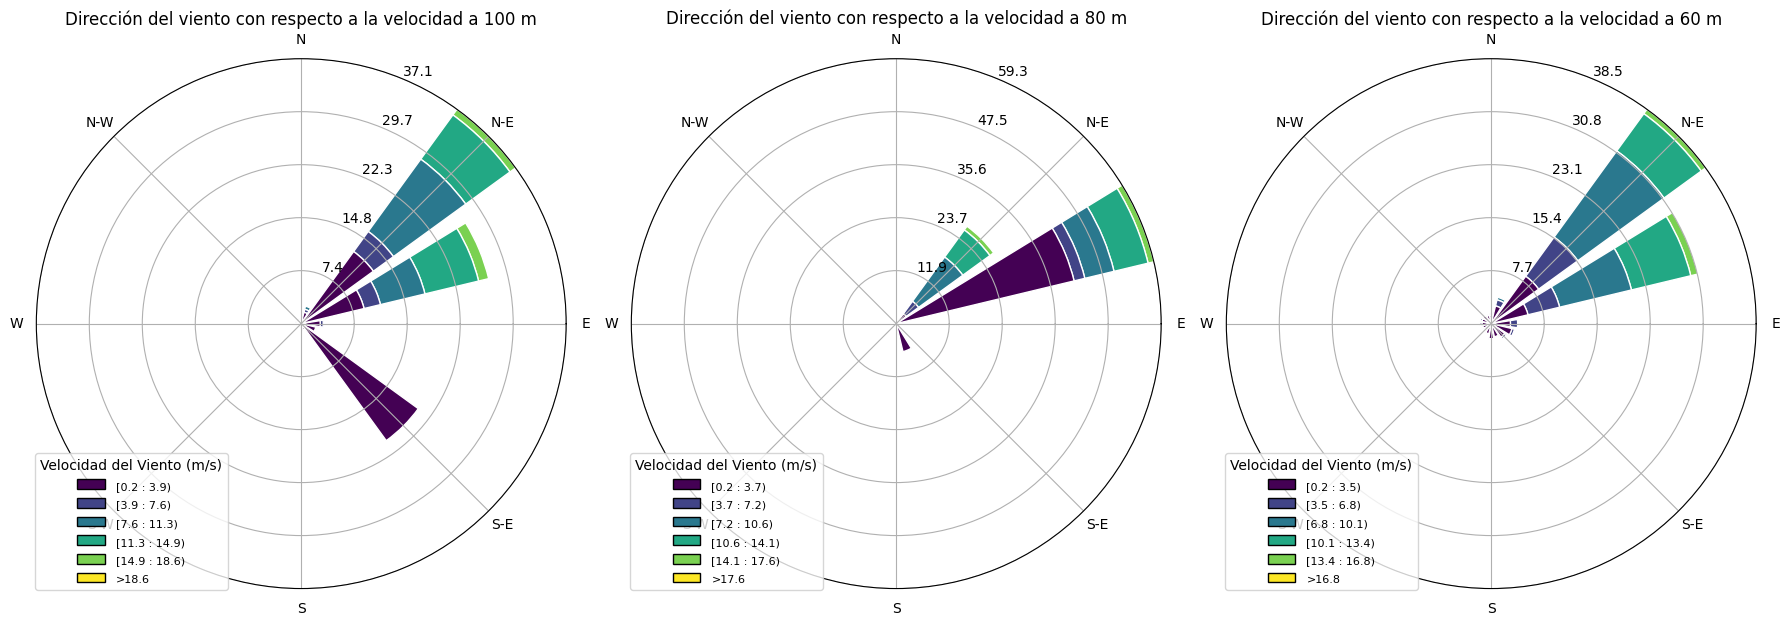

In [8]:
# Definir las columnas de dirección y velocidad del viento para diferentes alturas
configuraciones = [
    {'direccion_viento': 'VarName55', 'velocidad_viento': 'VarName4', 'titulo': 'Dirección del viento con respecto a la velocidad a 100 m'},
    {'direccion_viento': 'VarName58', 'velocidad_viento': 'VarName14', 'titulo': 'Dirección del viento con respecto a la velocidad a 80 m'},
    {'direccion_viento': 'VarName32', 'velocidad_viento': 'VarName24', 'titulo': 'Dirección del viento con respecto a la velocidad a 60 m'}
]

# Crear la figura para los subgráficos
fig = plt.figure(figsize=(18, 6))

# Crear subgráficos de Rosa de los Vientos para cada configuración
for i, config in enumerate(configuraciones):
    direccion_viento = config['direccion_viento']
    velocidad_viento = config['velocidad_viento']
    
    # Eliminar filas con valores faltantes o no numéricos en las columnas de interés
    data_cleaned = data[[direccion_viento, velocidad_viento]].dropna()
    
    # Crear el gráfico de Rosa de los Vientos
    ax = fig.add_subplot(1, 3, i + 1, projection='windrose')  # Subgráfico en la figura
    ax.bar(data_cleaned[direccion_viento], data_cleaned[velocidad_viento], normed=True, opening=0.8, edgecolor='white')
    
    # Configurar etiquetas y título
    ax.set_legend(title="Velocidad del Viento (m/s)")
    ax.set_title(config['titulo'])

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()


1. **Gráfico de 100 m de altura**: Este gráfico revela que, a 100 m de altura, los vientos predominan del suroeste (SW) y del norte-noreste (N-NE). Los vientos de mayor velocidad (>18.6 m/s) tienden a soplar desde el N-NE, mientras que las velocidades de viento más bajas (0.2 - 3.9 m/s) provienen principalmente del suroeste (SW). Esta distribución es común en ciertos tipos de terrenos donde los patrones de viento están influenciados por características geográficas como montañas y cuerpos de agua (Stull, 2015).

2. **Gráfico de 80 m de altura**: A una altura de 80 m, los vientos muestran un patrón similar al de 100 m, con predominancia desde el norte-noreste (N-NE) y el oeste-noroeste (N-W). Sin embargo, a esta altura, los vientos de mayor velocidad (17.6 m/s) se observan más consistentemente del N-NE. Las velocidades del viento en el rango de 7.2 - 10.6 m/s están distribuidas entre varias direcciones, sugiriendo una mayor variabilidad direccional en comparación con los datos de 100 m.

3. **Gráfico de 60 m de altura**: A 60 m, los vientos también son predominantemente del N-NE, pero con una mayor presencia de vientos desde el N-W en comparación con las alturas superiores. Los vientos de alta velocidad (16.8 m/s) son menos comunes a esta altura, lo que puede indicar una reducción de las velocidades de viento debido a la fricción con la superficie terrestre, según lo esperado en la teoría de la capa límite atmosférica (Stull, 1988).

En conjunto, estos gráficos muestran cómo la distribución direccional y la intensidad del viento pueden variar significativamente con la altura. Esta información es crucial para entender las condiciones del viento en diferentes niveles y para optimizar la ubicación de aerogeneradores u otras infraestructuras sensibles al viento.

## **Visualización de la Temperatura a Diferentes Alturas**

Para analizar las variaciones y patrones de la temperatura en diferentes alturas, se presentan visualizaciones de las series temporales de temperatura media y su desviación estándar a 100 metros y 20 metros de altura. Estas gráficas permiten observar la evolución temporal de la temperatura en ambas alturas y ayudan a identificar posibles tendencias, patrones estacionales y anomalías en los datos recolectados. Para este propósito, se han renombrado las columnas de la base de datos para reflejar de manera clara las variables de temperatura media (AVG) y desviación estándar (SD) correspondientes a las alturas de 100 metros y 20 metros.

Se ha utilizado una figura de 2x2 subgráficos para representar estos datos de manera organizada: el primer subgráfico muestra la evolución de la temperatura media a 100 metros (`Temperatura AVG 100 m`), mientras que el segundo subgráfico presenta la desviación estándar de la temperatura a la misma altura (`Temperatura SD 100 m`). Los dos subgráficos inferiores ilustran de manera similar la temperatura media y su desviación estándar a 20 metros (`Temperatura AVG 20 m` y `Temperatura SD 20 m`). Estas visualizaciones no solo facilitan la comprensión de las fluctuaciones de temperatura a diferentes niveles, sino que también proporcionan una herramienta útil para evaluar la consistencia y variabilidad de las mediciones a lo largo del tiempo. Además, al utilizar una paleta de colores fríos para las gráficas, se refuerza la interpretación visual de los datos relacionados con el análisis ambiental (Tufte, 2001). Esta presentación gráfica es fundamental para identificar patrones estacionales, tendencias y posibles puntos de anomalía que podrían requerir una investigación adicional (Hyndman & Athanasopoulos, 2018).

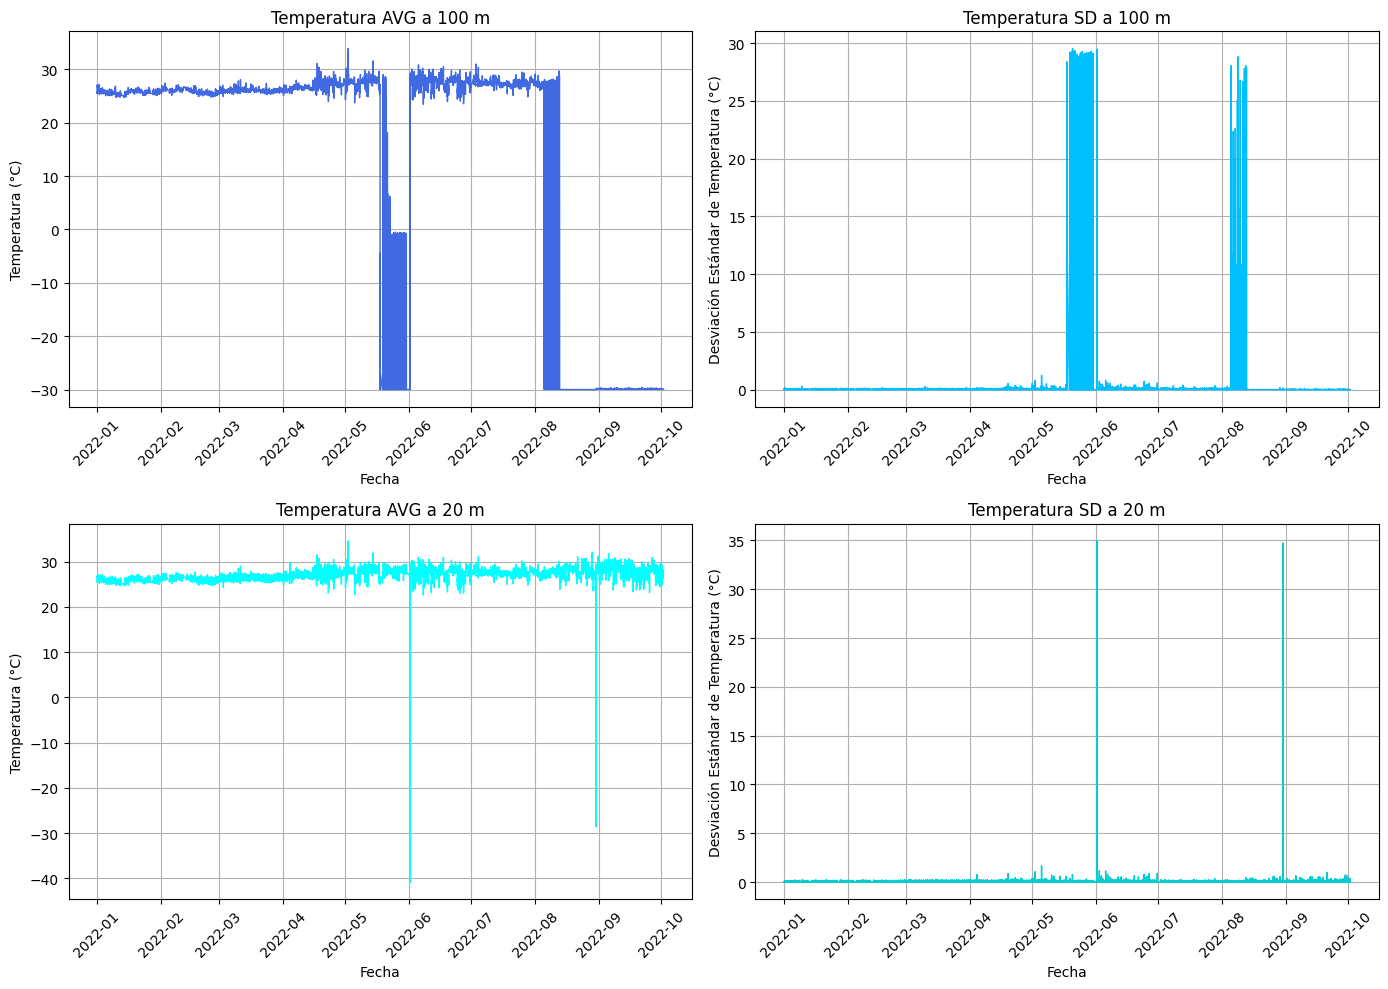

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Renombrar columnas
data.rename(columns={
    'VarName43': 'Temperatura AVG 100 m',
    'VarName44': 'Temperatura SD 100 m',
    'VarName47': 'Temperatura AVG 20 m',
    'VarName48': 'Temperatura SD 20 m'
}, inplace=True)

# Crear una figura con 2x2 subgráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Gráfico de Temperatura AVG a 100 m
axs[0, 0].plot(data['Fecha'], data['Temperatura AVG 100 m'], color='royalblue', linewidth=1)
axs[0, 0].set_title('Temperatura AVG a 100 m')
axs[0, 0].set_xlabel('Fecha')
axs[0, 0].set_ylabel('Temperatura (°C)')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(True)

# 2. Gráfico de Temperatura SD a 100 m
axs[0, 1].plot(data['Fecha'], data['Temperatura SD 100 m'], color='deepskyblue', linewidth=1)
axs[0, 1].set_title('Temperatura SD a 100 m')
axs[0, 1].set_xlabel('Fecha')
axs[0, 1].set_ylabel('Desviación Estándar de Temperatura (°C)')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(True)

# 3. Gráfico de Temperatura AVG a 20 m
axs[1, 0].plot(data['Fecha'], data['Temperatura AVG 20 m'], color='cyan', linewidth=1)
axs[1, 0].set_title('Temperatura AVG a 20 m')
axs[1, 0].set_xlabel('Fecha')
axs[1, 0].set_ylabel('Temperatura (°C)')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(True)

# 4. Gráfico de Temperatura SD a 20 m
axs[1, 1].plot(data['Fecha'], data['Temperatura SD 20 m'], color='darkturquoise', linewidth=1)
axs[1, 1].set_title('Temperatura SD a 20 m')
axs[1, 1].set_xlabel('Fecha')
axs[1, 1].set_ylabel('Desviación Estándar de Temperatura (°C)')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(True)

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()

1. **Temperatura AVG a 100 m**: Este gráfico muestra la temperatura promedio a 100 m sobre el nivel del suelo a lo largo del tiempo. Se observan valores que oscilan alrededor de los 20-30 °C en la mayoría de los periodos, pero existen dos grandes caídas de temperatura por debajo de -20 °C alrededor de mediados de junio y mediados de agosto de 2022. Estas caídas podrían indicar errores de medición, condiciones climáticas inusuales o eventos específicos que deben investigarse más a fondo.

2. **Temperatura SD a 100 m**: En el segundo gráfico, la desviación estándar de la temperatura a 100 m muestra picos muy altos, especialmente alrededor de los mismos periodos en los que se observan caídas abruptas en la temperatura promedio. Los picos indican una alta variabilidad en las mediciones durante estos periodos, lo que refuerza la idea de posibles anomalías o eventos no regulares. Un comportamiento tan errático puede afectar la interpretación de la estabilidad térmica a esa altura.

3. **Temperatura AVG a 20 m**: Similar al gráfico de temperatura a 100 m, este gráfico muestra la temperatura promedio a 20 m. En general, la temperatura parece ser más estable y mantiene una tendencia alrededor de los 25-30 °C. Sin embargo, se observan algunas caídas bruscas a -40 °C, especialmente en junio y agosto de 2022, lo que nuevamente sugiere anomalías o problemas en los datos capturados que requieren validación o corrección.

4. **Temperatura SD a 20 m**: Finalmente, la desviación estándar de la temperatura a 20 m muestra comportamientos similares a los observados a 100 m, pero con picos más espaciados y menos pronunciados. Esto indica que la variabilidad de la temperatura es generalmente baja a esta altura, salvo en los puntos donde se identifican caídas significativas de temperatura, lo que implica que estos eventos podrían no ser comunes y también podrían estar relacionados con errores de medición o condiciones atípicas.

**Conclusión**: Estos gráficos sugieren la necesidad de realizar un análisis adicional para comprender las causas detrás de las caídas abruptas de temperatura y los picos en la desviación estándar. La validación de los datos es esencial para descartar problemas de sensor o errores de captura de datos. En escenarios de monitoreo ambiental o meteorológico, garantizar la calidad y consistencia de los datos es fundamental para análisis confiables y la toma de decisiones.

## **Descomposición Estacional**

En esta sección, se realiza un análisis detallado de las diferentes variables relacionadas con las mediciones climáticas, como la velocidad del viento, la presión, la humedad y la temperatura, a diferentes alturas. La descomposición estacional es una herramienta clave que permite desglosar las series temporales en componentes fundamentales para identificar patrones a lo largo del tiempo. Estas variables juegan un papel crucial en el estudio de fenómenos meteorológicos y son fundamentales para entender los comportamientos estacionales, las tendencias a largo plazo y la variabilidad inherente en los datos recopilados. Utilizando esta técnica, es posible descomponer la serie temporal de cada variable en sus elementos constitutivos, lo que facilita la identificación de tendencias, patrones estacionales y variaciones residuales. Este enfoque permite una visualización clara y estructurada del comportamiento de cada variable a lo largo del tiempo, proporcionando insights valiosos para estudios de análisis climático y la toma de decisiones basadas en datos.

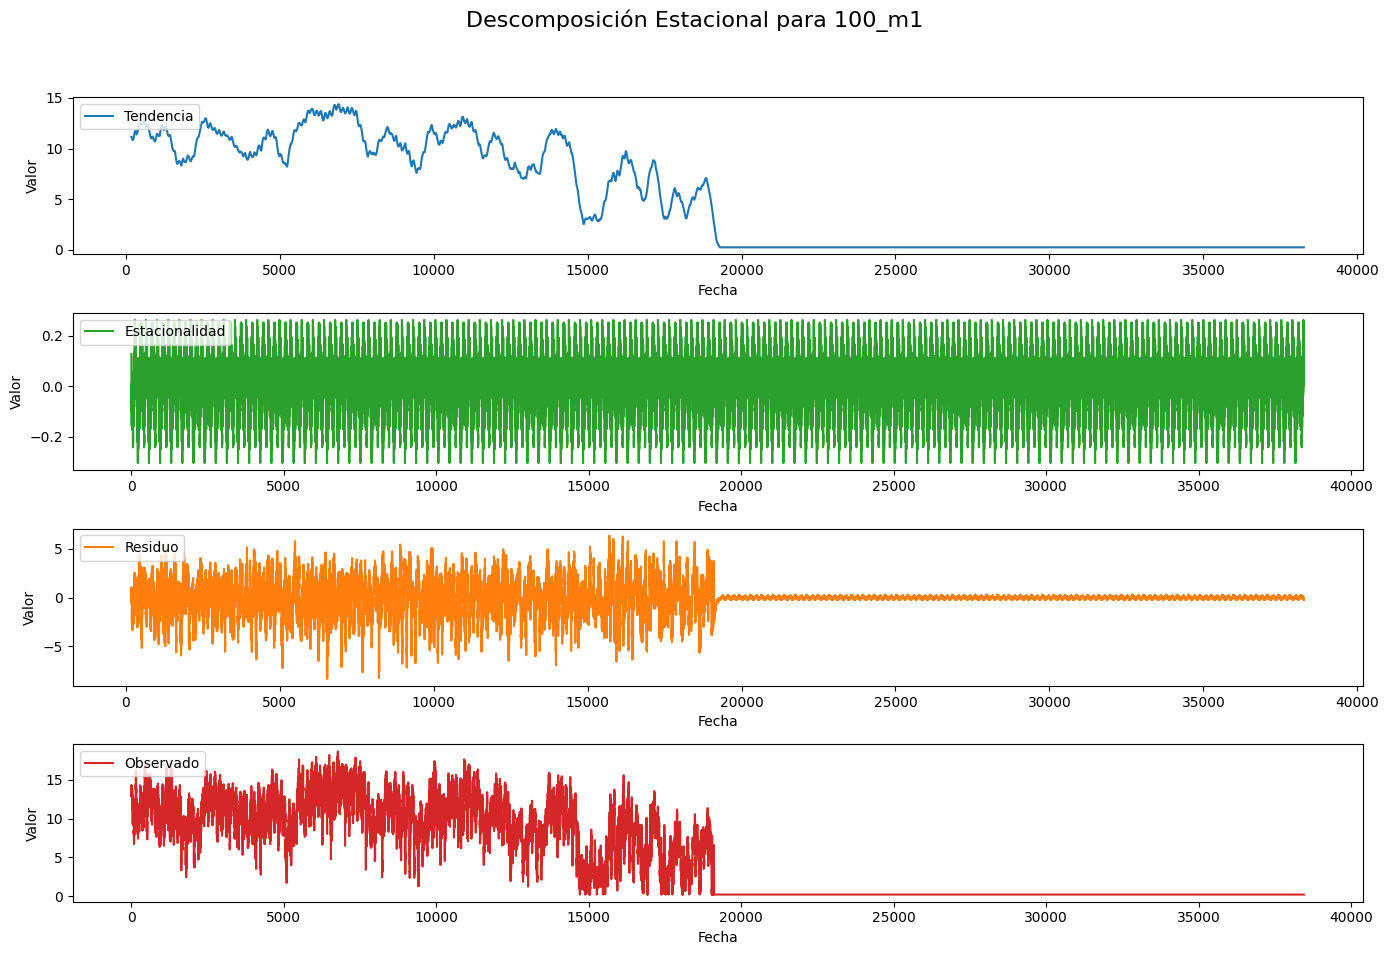

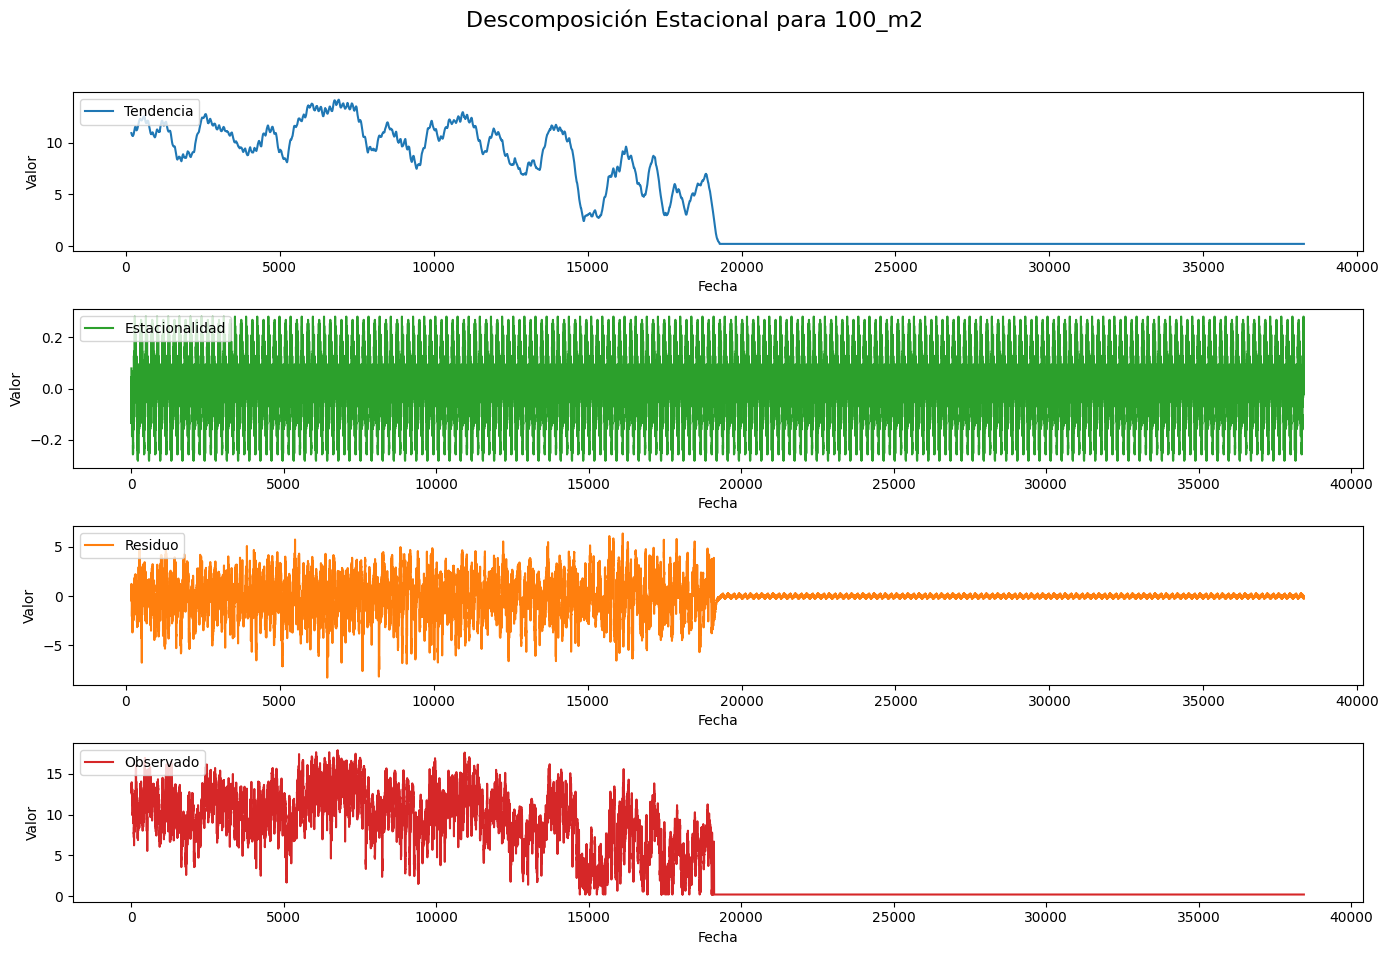

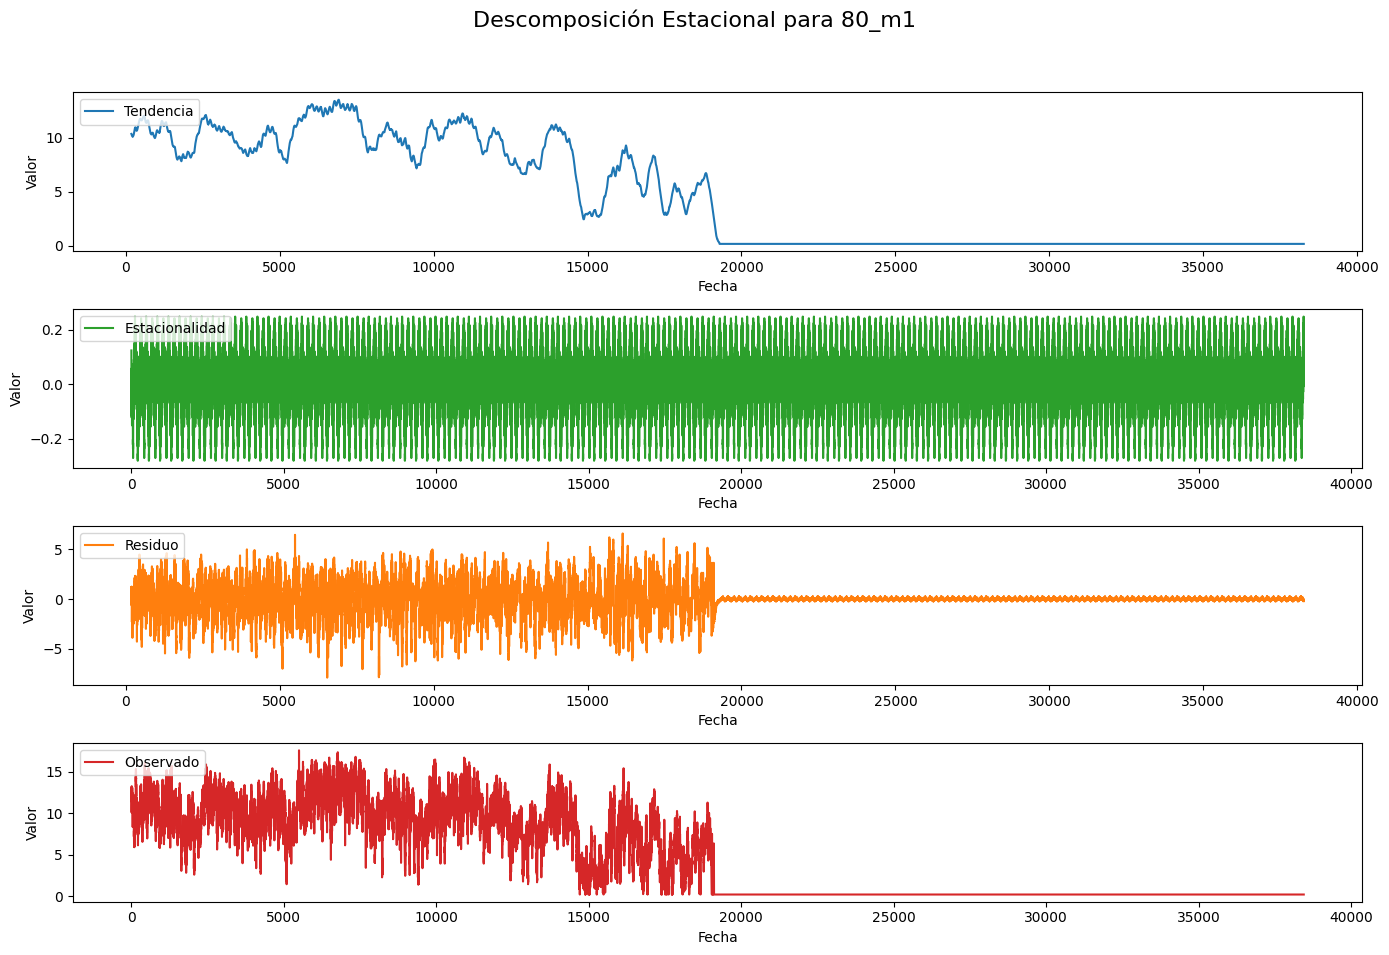

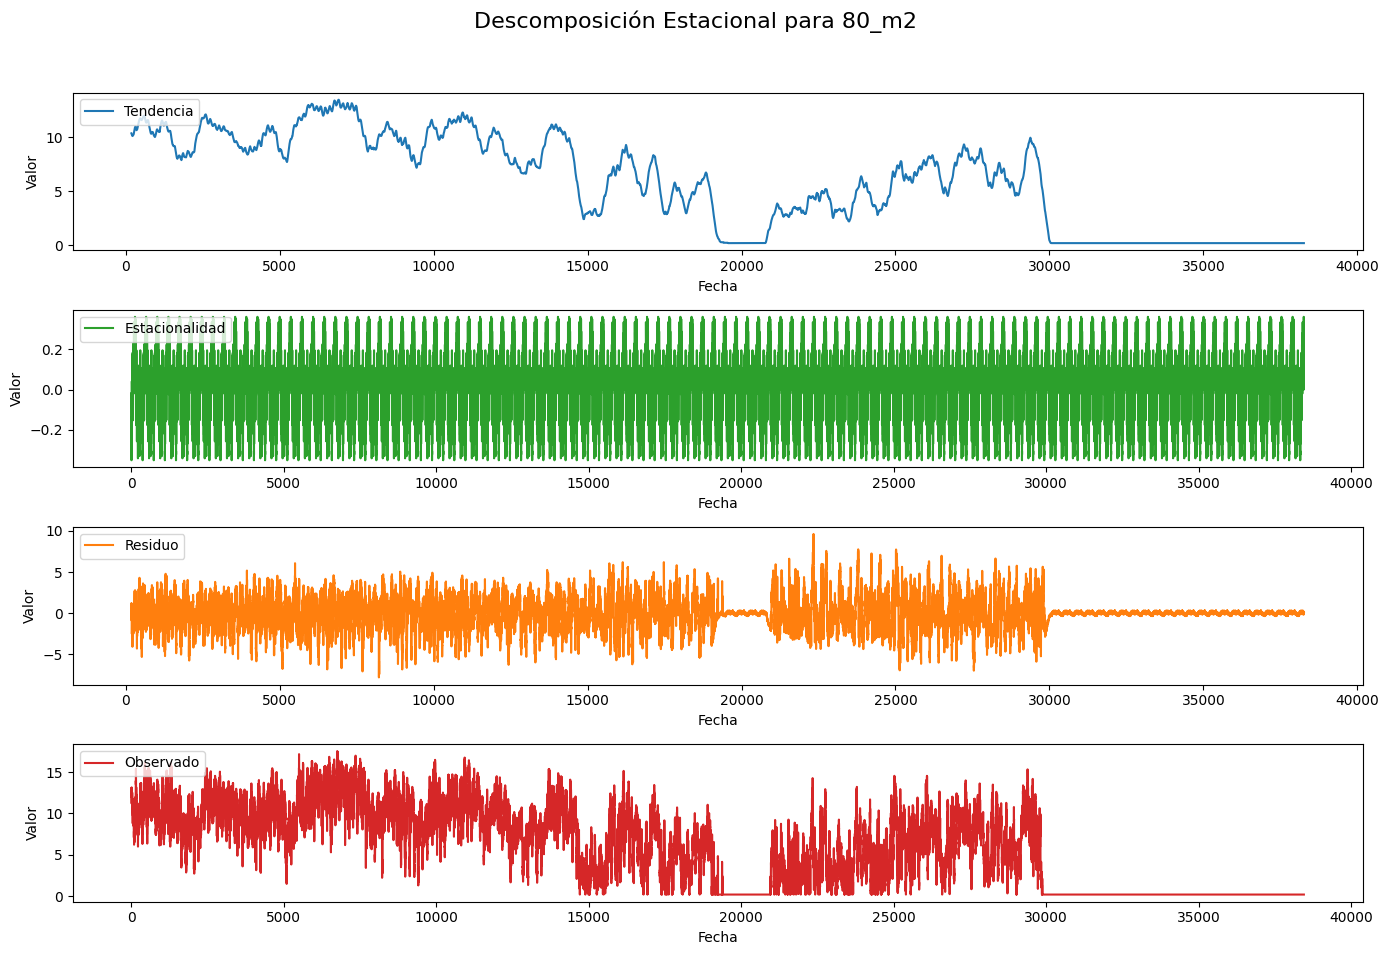

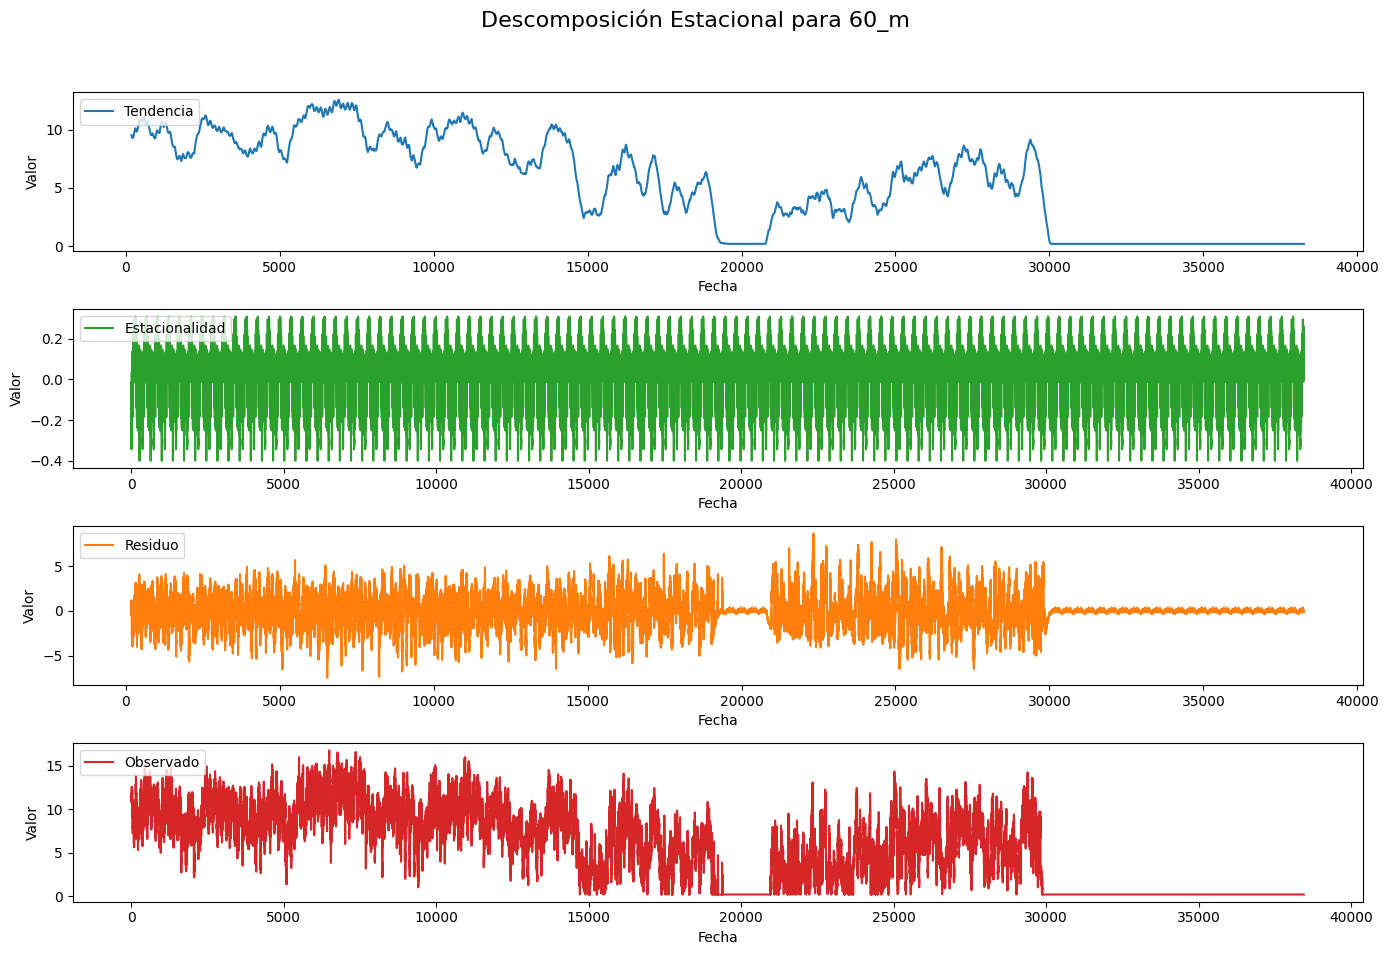

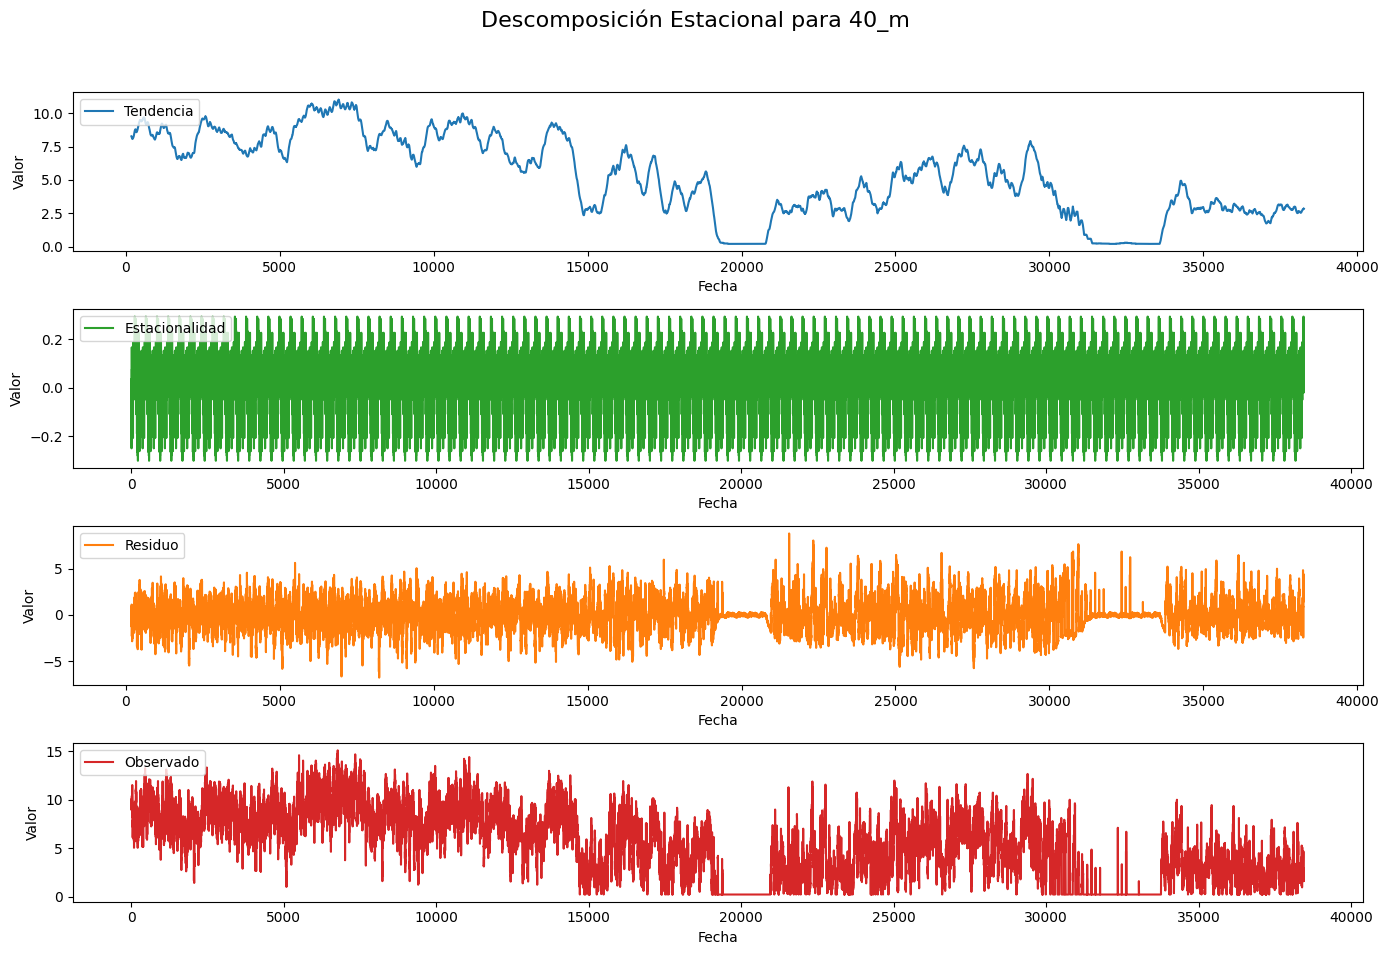

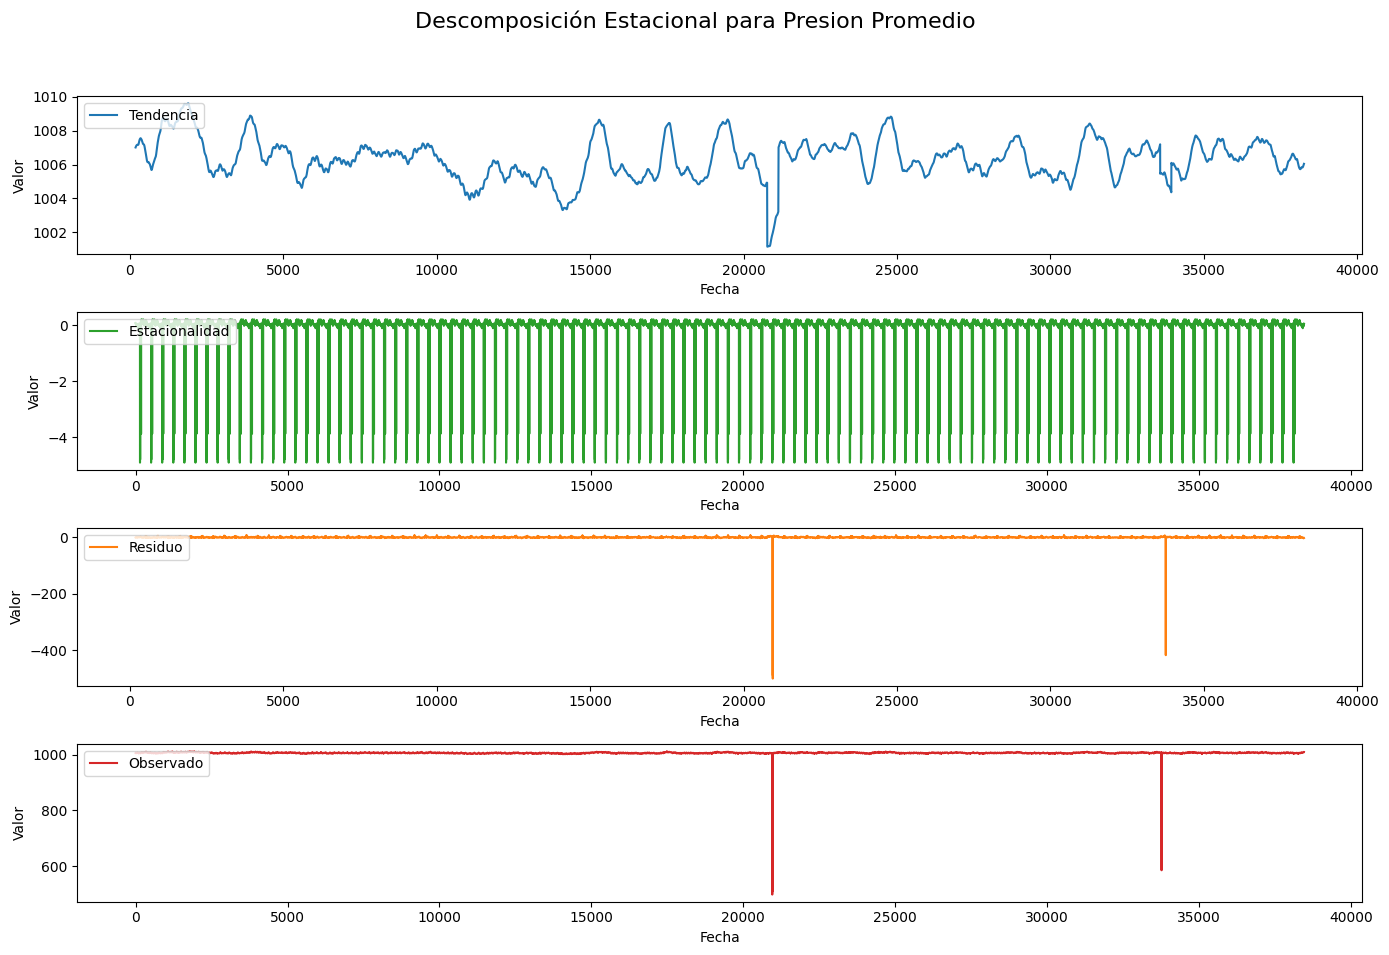

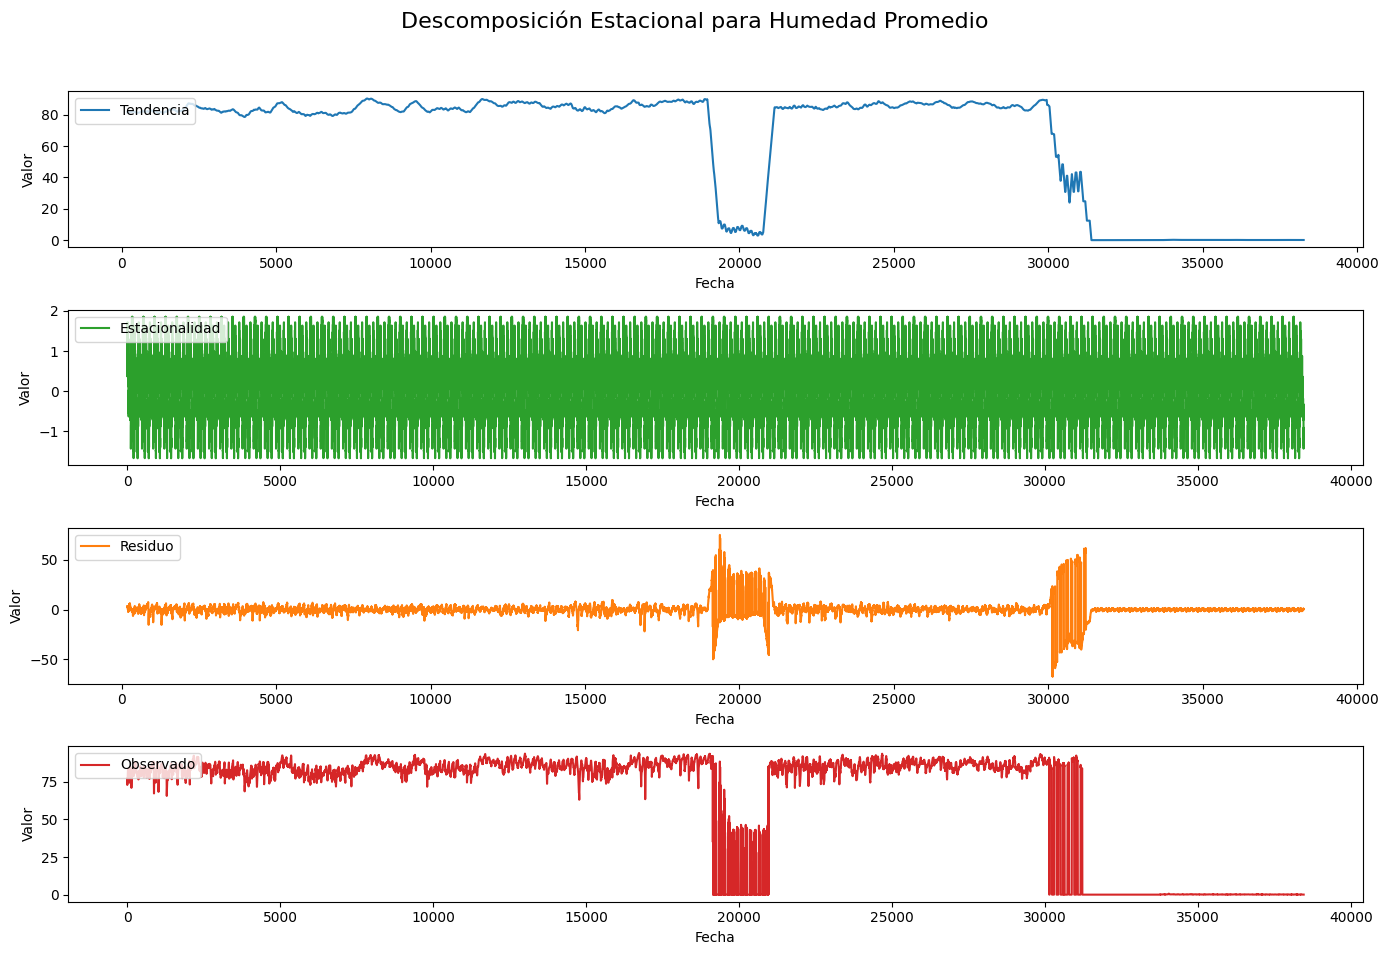

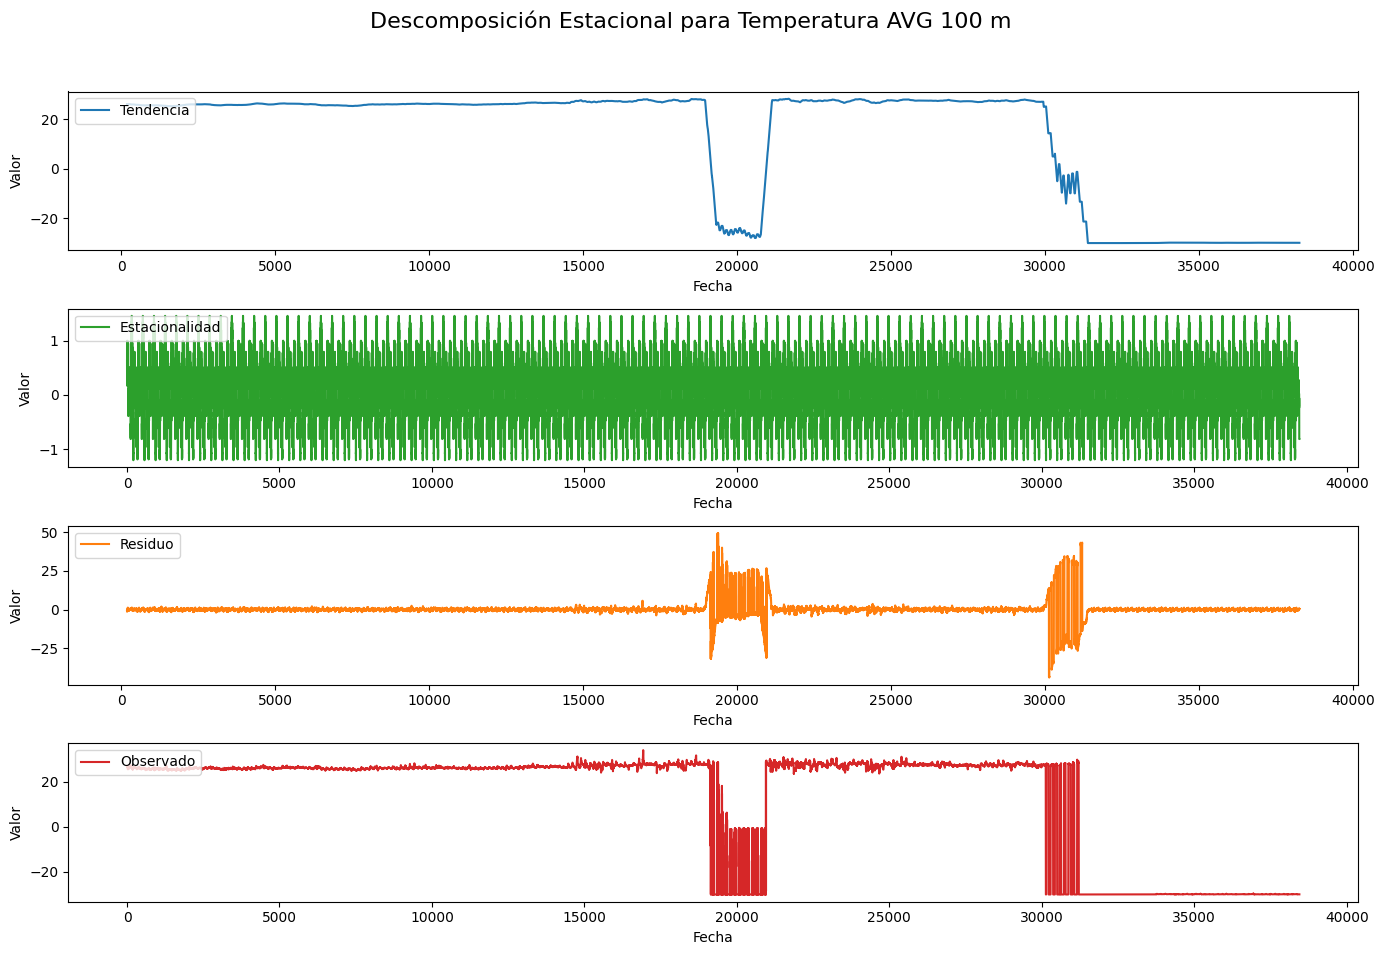

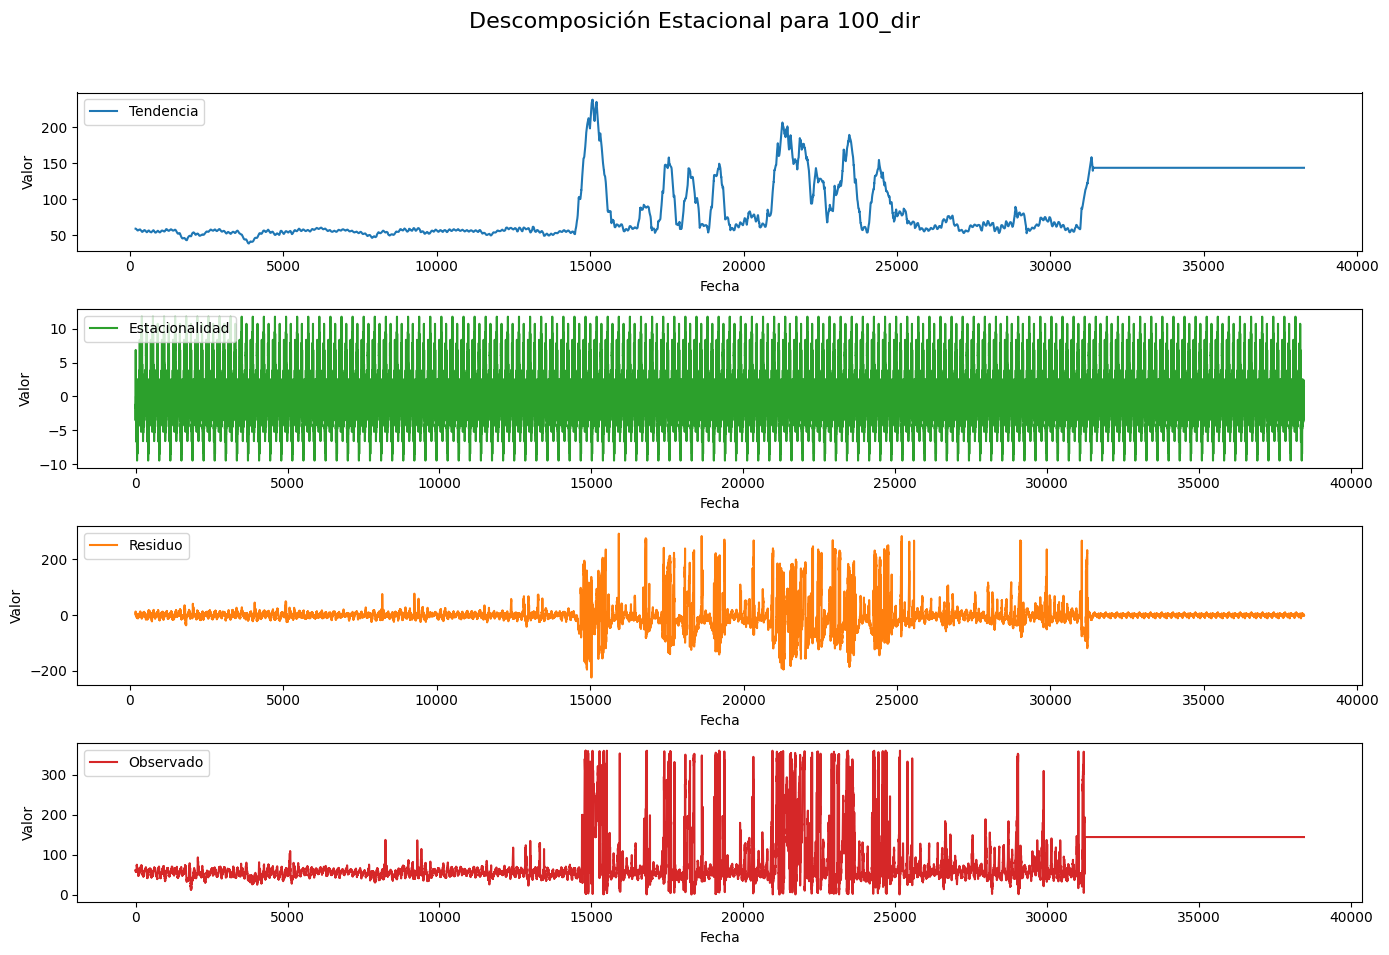

In [10]:
data.rename(columns={
    'VarName4': '100_m1',
    'VarName9': '100_m2',
    'VarName14': '80_m1',
    'VarName19': '80_m2',
    'VarName24': '60_m',
    'VarName29': '40_m',
    'VarName55': '100_dir',
    'VarName35': 'Presion Promedio',  
    'VarName39': 'Humedad Promedio',  
    'VarName43': 'Temperatura AVG 100 m'  
}, inplace=True)

variables_a_analizar = [
    '100_m1',  # Velocidad del viento a 100 m (sensor 1)
    '100_m2',  # Velocidad del viento a 100 m (sensor 2)
    '80_m1',   # Velocidad del viento a 80 m (sensor 1)
    '80_m2',   # Velocidad del viento a 80 m (sensor 2)
    '60_m',    # Velocidad del viento a 60 m
    '40_m',    # Velocidad del viento a 40 m
    'Presion Promedio',  # Presión
    'Humedad Promedio',  # Humedad
    'Temperatura AVG 100 m',  # Temperatura
    '100_dir'  # Dirección del viento
]

periodo = 365  

for variable in variables_a_analizar:
    if variable not in data.columns:
        print(f"Columna '{variable}' no encontrada en el DataFrame. Verifica los nombres.")
        continue
    
    # Realizar la descomposición estacional
    descomposicion = seasonal_decompose(data[variable].dropna(), model='additive', period=periodo)
    
    # Graficar los componentes de la descomposición
    plt.figure(figsize=(14, 10))
    plt.suptitle(f'Descomposición Estacional para {variable}', fontsize=16)
    
    # Tendencia
    plt.subplot(411)
    plt.plot(descomposicion.trend, label='Tendencia', color='tab:blue')
    plt.legend(loc='upper left')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    
    # Estacionalidad
    plt.subplot(412)
    plt.plot(descomposicion.seasonal, label='Estacionalidad', color='tab:green')
    plt.legend(loc='upper left')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    
    # Residuo
    plt.subplot(413)
    plt.plot(descomposicion.resid, label='Residuo', color='tab:orange')
    plt.legend(loc='upper left')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    
    # Serie Observada
    plt.subplot(414)
    plt.plot(data[variable], label='Observado', color='tab:red')
    plt.legend(loc='upper left')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


En los gráficos de descomposición estacional presentados, se analizan diferentes variables meteorológicas (como velocidad del viento, temperatura, humedad, presión, y dirección del viento) a distintas alturas o ubicaciones. Cada gráfico de descomposición estacional se divide en cuatro componentes principales:

1. **Tendencia**: Muestra la evolución a largo plazo de cada variable, indicando cambios graduales en el nivel medio de la serie temporal. Para la mayoría de las variables, se observa una tendencia oscilante, lo que puede indicar fluctuaciones en los patrones climáticos a lo largo del tiempo.

2. **Estacionalidad**: Refleja los patrones repetitivos que ocurren en intervalos regulares debido a factores estacionales. Se aprecia una fuerte estacionalidad en todas las variables, con ciclos bien definidos que sugieren la presencia de patrones meteorológicos diarios o estacionales.

3. **Residuo**: Representa la variabilidad que no puede ser explicada por la tendencia o la estacionalidad, es decir, la parte aleatoria o ruido de la serie. Para algunas variables, como la humedad y la presión, el residuo parece mantenerse relativamente estable, mientras que para otras, como la dirección del viento, muestra una mayor variabilidad.

4. **Serie Observada**: Esta es la serie temporal original que combina los tres componentes anteriores. En general, las series muestran comportamientos complejos que reflejan la interacción de la tendencia, la estacionalidad y el ruido.

En conjunto, estos gráficos permiten identificar tanto patrones regulares como anomalías en las variables meteorológicas, proporcionando información valiosa para la modelación y análisis del comportamiento climático en las alturas y ubicaciones estudiadas.

## **Análisis de Estadísticas Descriptivas**

En esta sección se presentan las estadísticas descriptivas de las principales variables meteorológicas medidas en diferentes alturas y ubicaciones dentro del sistema de monitoreo. El análisis estadístico descriptivo proporciona una visión general de los datos a través de medidas como la media, mediana, desviación estándar, valores mínimo y máximo, entre otros. Además de estos parámetros básicos, también se calculan la asimetría y curtosis para cada variable, lo que permite evaluar la distribución y el grado de concentración de los datos alrededor de la media. Estos indicadores son esenciales para comprender la naturaleza y las características de cada variable, identificando posibles sesgos o anomalías que puedan influir en los análisis posteriores y en la modelación predictiva.

In [11]:
variables_a_analizar = [
    '100_m2',   # Velocidad del viento a 100 m (sensor 2)
    '80_m2',    # Velocidad del viento a 80 m (sensor 2)
    '100_dir',  # Dirección del viento a 100 m
    'Presion Promedio',  # Presión
    'Humedad Promedio',  # Humedad
    'Temperatura AVG 100 m'  # Temperatura a 100 m
]

summary_stats = data[variables_a_analizar].describe().T

summary_stats['Asimetría'] = data[variables_a_analizar].skew()
summary_stats['Curtosis'] = data[variables_a_analizar].kurtosis()

display(summary_stats)

count         mean        std         min  \
100_m2                 38448.0     4.824243   5.287134    0.210100   
80_m2                  38448.0     5.867174   4.673443    0.207600   
100_dir                38448.0    88.024890  61.537881    0.000000   
Presion Promedio       38448.0  1006.317709   4.927476  497.520002   
Humedad Promedio       38448.0    64.068326  36.568352    0.000000   
Temperatura AVG 100 m  38448.0    12.716995  24.266811  -30.000000   

                               25%          50%          75%          max  \
100_m2                    0.210100     0.210100     9.865900    17.866420   
80_m2                     0.207600     6.273000     9.857100    17.530750   
100_dir                  49.670000    60.730000   143.800000   359.960000   
Presion Promedio       1005.181063  1006.336150  1007.509869  1012.428307   
Humedad Promedio         65.073013    83.435059    87.081909    94.093323   
Temperatura AVG 100 m    18.679351    26.022644    27.167053    33.903809   

                       Asimetría     Curtosis  
100_m2                  0.536923    -1.321064  
80_m2                   0.130310    -1.338833  
100_dir                 1.962225     4.286474  
Presion Promedio      -79.825976  7510.579621  
Humedad Promedio       -1.143207    -0.633365  
Temperatura AVG 100 m  -1.171213    -0.608705

La tabla de estadísticas descriptivas presenta un resumen de las principales características de las variables meteorológicas analizadas en el estudio, que incluyen la velocidad del viento a 100 m y 80 m, la dirección del viento a 100 m, la presión promedio, la humedad promedio, y la temperatura promedio a 100 m. Se observa que la **media** de la velocidad del viento a 100 m es de 4.82 m/s con una desviación estándar de 5.29, indicando una considerable variabilidad en los datos. Similarmente, la velocidad del viento a 80 m tiene una media de 5.87 m/s y una desviación estándar de 4.67. La **dirección del viento a 100 m** muestra un promedio de 88.02 grados con una alta variabilidad (desviación estándar de 61.54), lo que sugiere direcciones cambiantes. 

En cuanto a la **presión promedio**, se destaca una media de 1006.32 hPa, pero con una marcada asimetría negativa (-79.83) y una curtosis extremadamente alta (7510.58), lo cual indica la presencia de valores atípicos significativos en la distribución. Por otro lado, la **humedad promedio** presenta una media de 64.07% con asimetría y curtosis relativamente normales. Finalmente, la **temperatura promedio a 100 m** tiene una media de 12.72°C, mostrando también un rango amplio de variación desde -30°C hasta 33.90°C, lo cual se evidencia en su desviación estándar de 24.27. La asimetría y curtosis de esta variable sugieren una distribución más sesgada y menos concentrada alrededor de la media. En general, estas estadísticas ayudan a comprender la dispersión, sesgo y presencia de posibles anomalías en los datos, proporcionando una base sólida para análisis más profundos y modelado predictivo.

## **Prueba de Estacionariedad: Dickey-Fuller Aumentada**

En esta sección, se lleva a cabo la prueba de Dickey-Fuller Aumentada (ADF) para evaluar la estacionariedad de las series de tiempo seleccionadas en el análisis. La estacionariedad es un supuesto crucial en muchos métodos de modelado de series temporales, como ARIMA, y se refiere a la constancia de las propiedades estadísticas de una serie a lo largo del tiempo, es decir, que la media, la varianza y la autocorrelación no cambian con el tiempo. La prueba de Dickey-Fuller Aumentada es una de las pruebas más utilizadas para determinar si una serie de tiempo es estacionaria.

Para cada variable analizada, se calcula el estadístico ADF, el valor p, el número de rezagos utilizados, el número de observaciones, y los valores críticos de la prueba. Estos resultados permiten identificar si las series de tiempo presentan una raíz unitaria (indicativo de no estacionariedad) o si son estacionarias. Un valor p bajo (generalmente menor a 0.05) sugiere que la serie es estacionaria. Los resultados obtenidos se presentan en forma tabular para facilitar su interpretación y servir como base para el modelado de series de tiempo posterior.

In [12]:
resultados_adf = {}

# Realizar la prueba de Dickey-Fuller Aumentada para cada variable
for variable in variables_a_analizar:
    serie = data[variable].dropna()  
    adf_result = adfuller(serie, autolag='AIC')
    
    resultados_adf[variable] = {
        'Estadístico ADF': adf_result[0],
        'p-value': adf_result[1],
        'Número de rezagos': adf_result[2],
        'Número de observaciones': adf_result[3],
        'Valores críticos': adf_result[4]
    }

resultados_adf_df = pd.DataFrame(resultados_adf).T
resultados_adf_df

Estadístico ADF   p-value Número de rezagos  \
100_m2                      -5.134682  0.000012                54   
80_m2                       -7.682225       0.0                40   
100_dir                    -13.129672       0.0                53   
Presion Promedio             -30.9248       0.0                20   
Humedad Promedio            -4.384848  0.000316                54   
Temperatura AVG 100 m       -4.258816  0.000523                54   

                      Número de observaciones  \
100_m2                                  38393   
80_m2                                   38407   
100_dir                                 38394   
Presion Promedio                        38427   
Humedad Promedio                        38393   
Temperatura AVG 100 m                   38393   

                                                        Valores críticos  
100_m2                 {'1%': -3.4305203367090096, '5%': -2.861615284...  
80_m2                  {'1%': -3.4305202746142522, '5%': -2.861615257...  
100_dir                {'1%': -3.4305203322721676, '5%': -2.861615282...  
Presion Promedio       {'1%': -3.430520185985949, '5%': -2.8616152182...  
Humedad Promedio       {'1%': -3.4305203367090096, '5%': -2.861615284...  
Temperatura AVG 100 m  {'1%': -3.4305203367090096, '5%': -2.861615284...

Los resultados de la prueba de Dickey-Fuller Aumentada (ADF) para las variables seleccionadas indican que todas las series de tiempo analizadas son estacionarias. Esto se evidencia por los valores p significativamente bajos (menores a 0.05) para todas las variables, lo que implica que se rechaza la hipótesis nula de que las series tienen una raíz unitaria, confirmando que son estacionarias. 

Los estadísticos ADF para las variables, como `100_m2` (-5.13), `80_m2` (-7.68), `100_dir` (-13.12), `Presion Promedio` (-30.92), `Humedad Promedio` (-4.38) y `Temperatura AVG 100 m` (-4.25), son menores que los valores críticos a los niveles de significancia del 1%, 5% y 10%, reforzando esta conclusión. Los números de rezagos utilizados varían entre 20 y 54, reflejando las diferentes dinámicas temporales y autocorrelaciones presentes en cada serie. Por lo tanto, los resultados sugieren que las series de tiempo son aptas para modelarse mediante técnicas que asumen estacionariedad, como modelos ARIMA, lo que proporciona una base sólida para la predicción y análisis de tendencias.


## **Autocorrelación y Correlación Parcial**

El análisis de funciones de autocorrelación (ACF) y autocorrelación parcial (PACF) es fundamental para entender la estructura temporal de las series de datos y la dependencia entre sus valores. La ACF mide la correlación entre los valores de una serie temporal con sus rezagos a diferentes intervalos de tiempo, mientras que la PACF muestra la correlación entre los valores de la serie con sus rezagos, eliminando la influencia de las correlaciones de los rezagos intermedios. Estos gráficos permiten identificar patrones como la estacionalidad, la persistencia de los efectos, y ayudan a determinar los parámetros adecuados (p y q) para modelos ARIMA. A continuación, se presentan los gráficos ACF y PACF para las variables seleccionadas, proporcionando información crucial para el modelado predictivo y el análisis de series temporales.

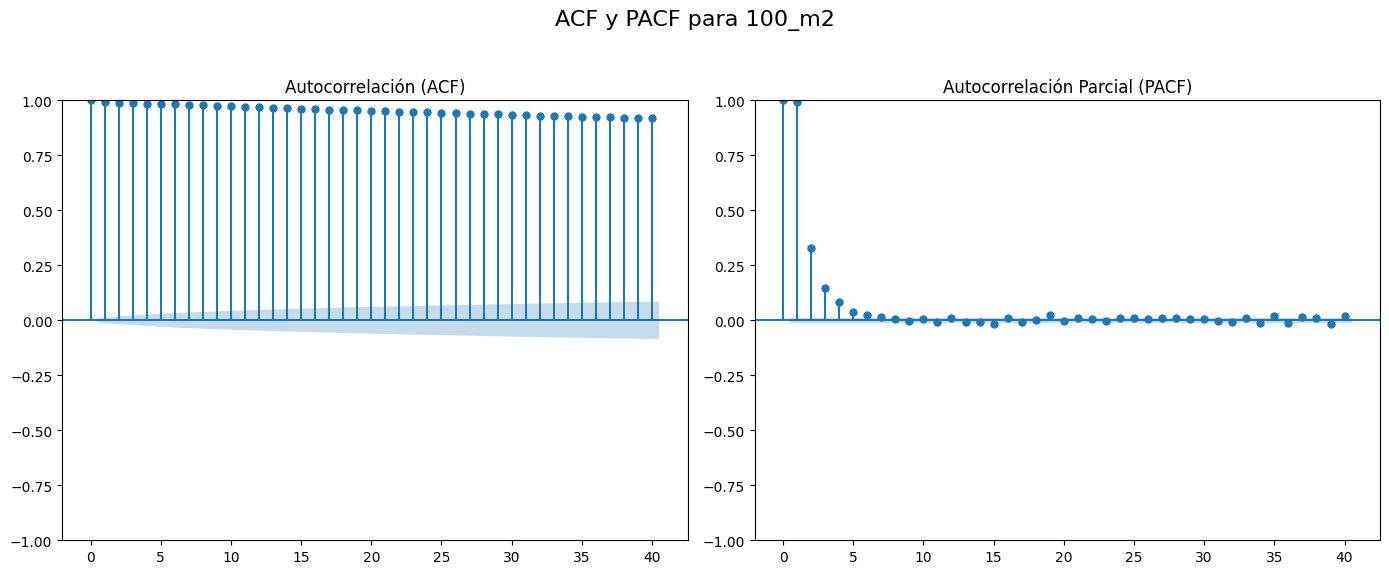

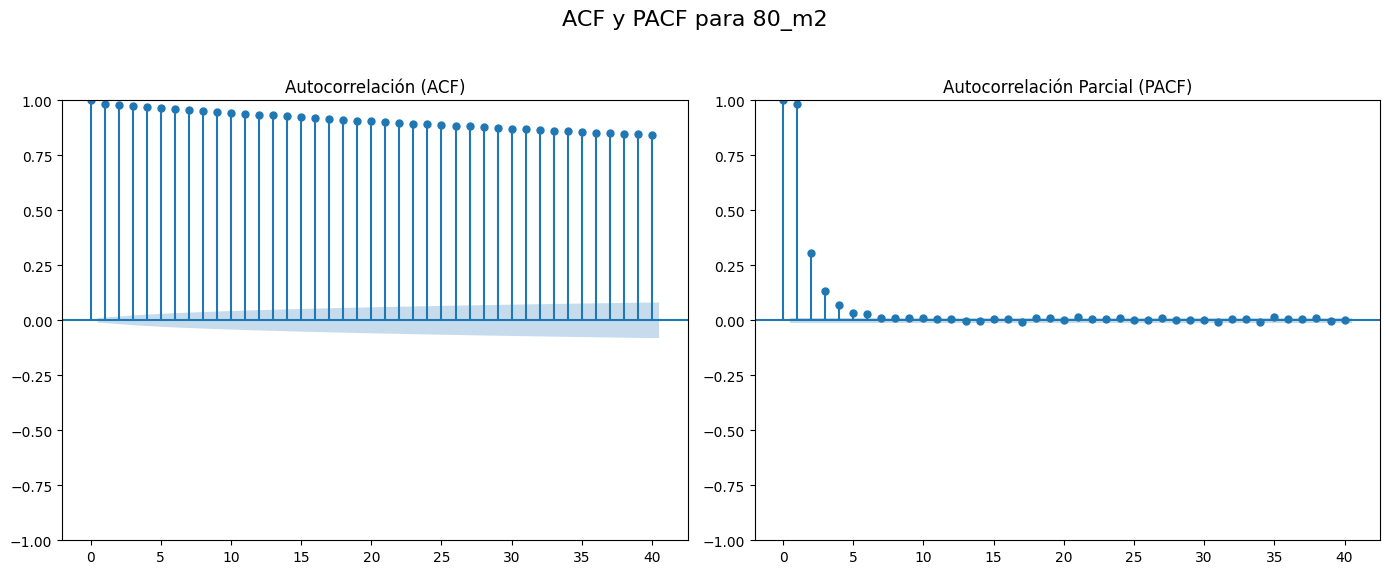

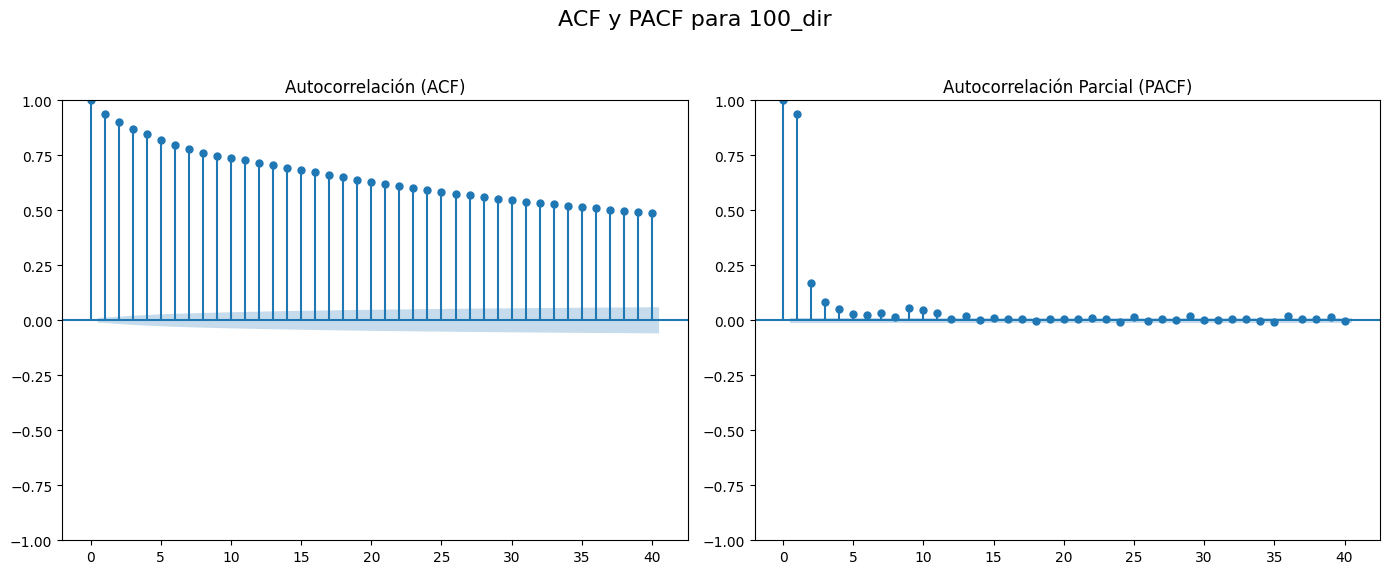

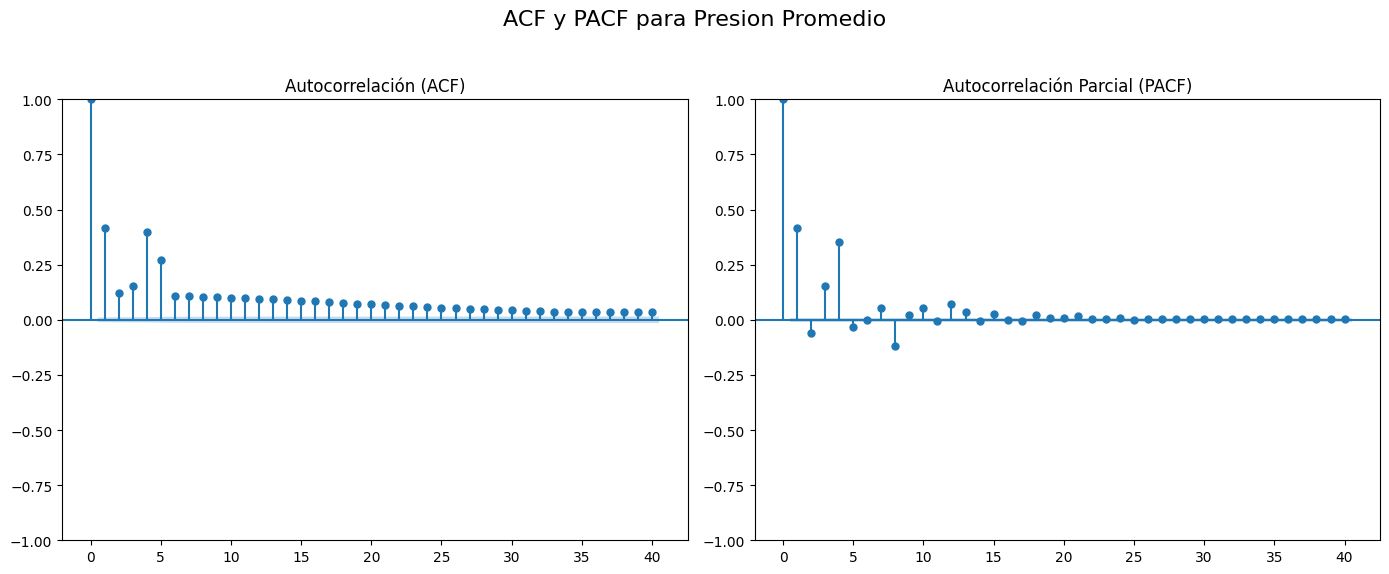

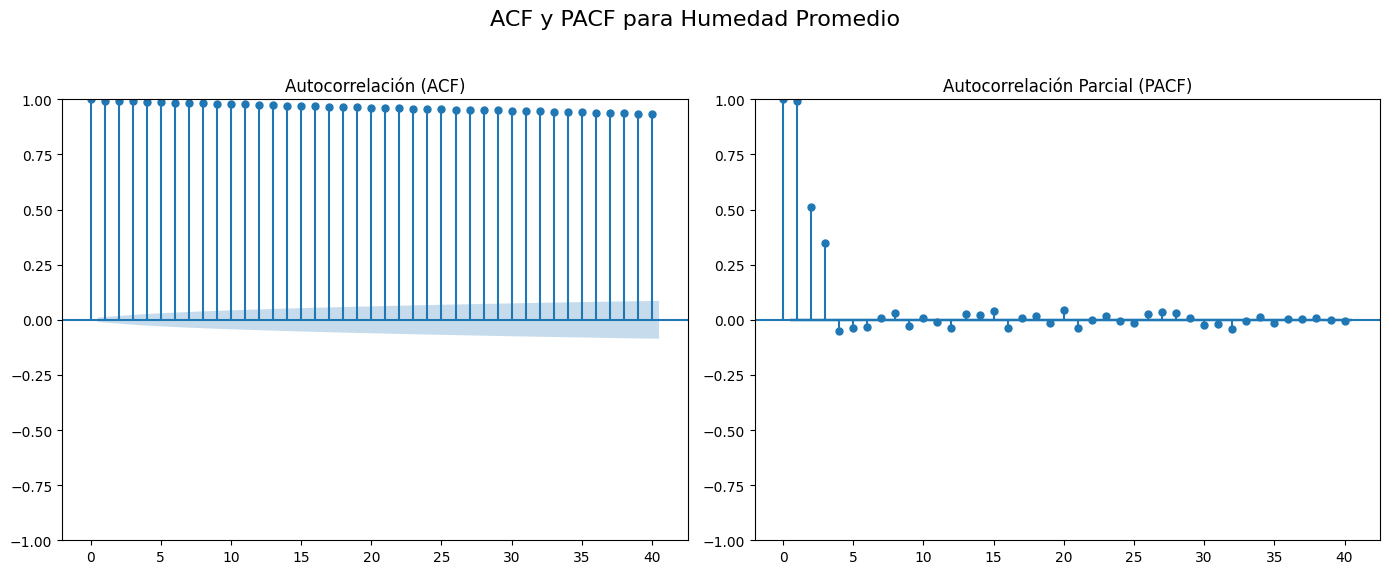

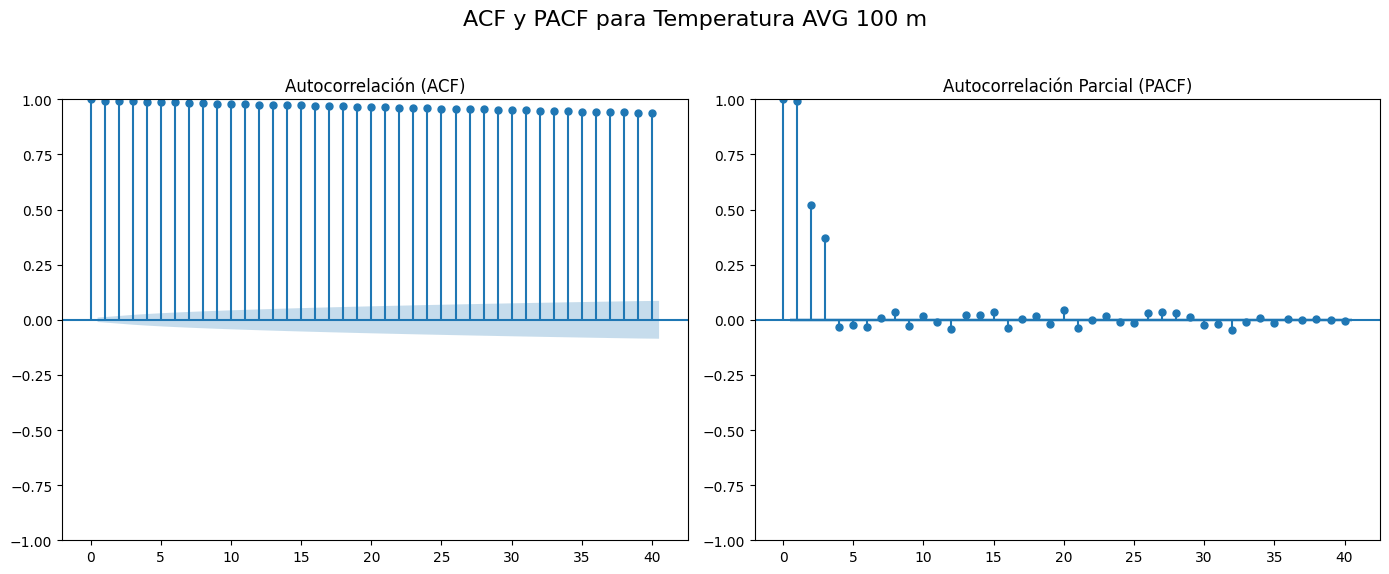

In [13]:
for variable in variables_a_analizar:
    plt.figure(figsize=(14, 6))
    plt.suptitle(f'ACF y PACF para {variable}', fontsize=16)

    # ACF
    plt.subplot(121)
    plot_acf(data[variable].dropna(), ax=plt.gca(), lags=40)
    plt.title('Autocorrelación (ACF)')

    # PACF
    plt.subplot(122)
    plot_pacf(data[variable].dropna(), ax=plt.gca(), lags=40, method='ywm')
    plt.title('Autocorrelación Parcial (PACF)')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

### **Consideraciones sobre los Resultados de ACF y PACF en Presencia de Outliers**

Los gráficos de ACF y PACF presentados indican un comportamiento de persistencia en la autocorrelación a lo largo de muchos rezagos para varias de las variables analizadas, como las velocidades del viento y la humedad. Este patrón sugiere la presencia de una estructura no estacionaria en los datos. Sin embargo, al considerar el problema identificado de valores fuera del rango esperado, es importante destacar que estos valores extremos podrían estar afectando significativamente los resultados observados en las gráficas de autocorrelación.

La presencia de outliers puede causar que los valores de autocorrelación se mantengan altos de manera artificial, introduciendo ruido en los datos que lleva a una interpretación errónea de los patrones subyacentes. Esto se manifiesta en la ACF como una aparente autocorrelación persistente, que no refleja necesariamente la verdadera naturaleza de la serie temporal. En este contexto, la ACF podría estar capturando no solo la relación temporal natural de los datos, sino también la distorsión provocada por estos valores anómalos.

De manera similar, las gráficas de PACF pueden verse afectadas por esta falsa autocorrelación, mostrando un comportamiento inicial significativo que cae rápidamente, pero que puede estar distorsionado por el ruido de los datos extremos. Esta situación complica la interpretación de la estructura autoregresiva real de la serie, afectando la selección de modelos estadísticos apropiados para el análisis de la serie temporal.

Por lo tanto, es crucial considerar la identificación y tratamiento de estos valores atípicos antes de realizar un análisis más profundo de las propiedades temporales de las series. La eliminación o imputación adecuada de los datos fuera de rango puede ayudar a mejorar la precisión del análisis de autocorrelación y a proporcionar una representación más clara de la estructura subyacente de las series temporales.

## **Análisis de Valores Faltantes en el Dataset**

La identificación y el tratamiento de valores faltantes son pasos fundamentales en la preparación de datos para cualquier análisis estadístico o modelado predictivo. En esta sección, se examina el porcentaje de valores faltantes en las principales variables seleccionadas del dataset. El análisis gráfico de los valores faltantes proporciona una visión clara de la magnitud y distribución de los datos faltantes en cada variable, permitiendo identificar posibles problemas de calidad de datos que podrían afectar el análisis subsecuente.

El gráfico de barras apiladas presentado muestra el porcentaje de valores faltantes y no faltantes para cada variable, destacando aquellas con mayor proporción de datos faltantes. Esta visualización es esencial para tomar decisiones informadas sobre cómo manejar los valores faltantes, ya sea mediante imputación, eliminación o alguna otra técnica, dependiendo del impacto potencial en el análisis y los modelos a desarrollar.

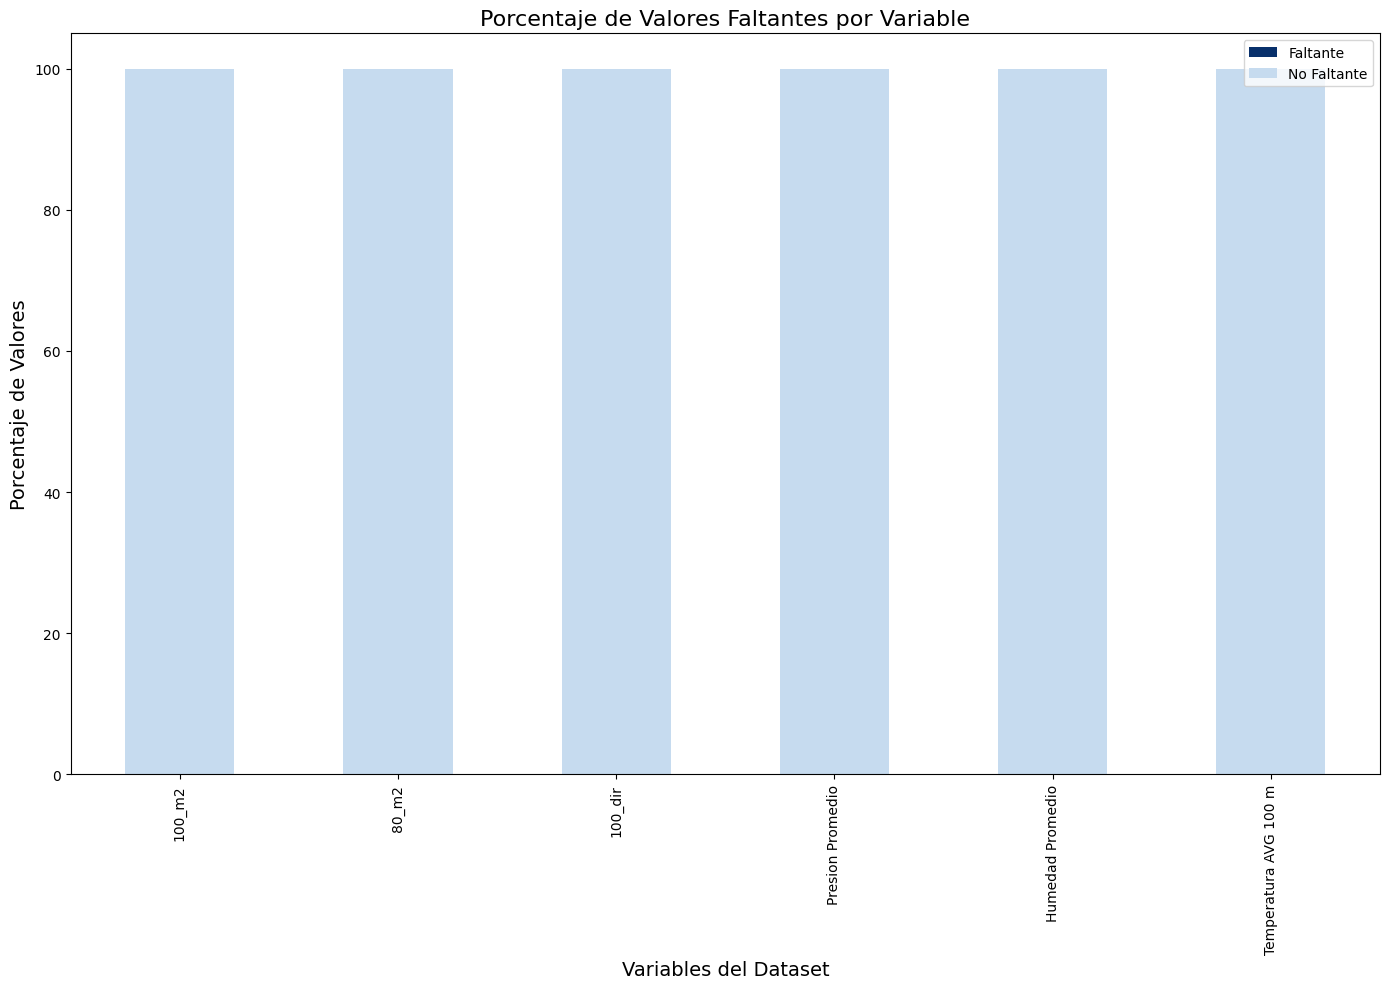

In [14]:
datos_seleccionados = data[variables_a_analizar]

# Calcula el porcentaje de valores faltantes
missing_percentages = (datos_seleccionados.isnull().mean() * 100).sort_values(ascending=False)

# Crea un DataFrame para el gráfico de barras apiladas
missing_data = pd.DataFrame({'Faltante': missing_percentages, 'No Faltante': 100 - missing_percentages})

# Gráfico de barras apiladas
plt.figure(figsize=(14, 10))  
missing_data.plot(kind='bar', stacked=True, color=['#08306b','#c6dbef'], ax=plt.gca())
plt.title('Porcentaje de Valores Faltantes por Variable', fontsize=16)
plt.xlabel('Variables del Dataset', fontsize=14)
plt.ylabel('Porcentaje de Valores', fontsize=14)
plt.xticks(rotation=90, fontsize=10)  
plt.legend(['Faltante', 'No Faltante'], loc='upper right')

plt.tight_layout()

## **Visualización de la Distribución de Datos a través de Boxplots**

La visualización de la distribución de datos es crucial para entender la variabilidad y detectar posibles valores atípicos que puedan afectar los análisis posteriores. En esta sección, se presenta un análisis visual de las principales variables del conjunto de datos a través de un gráfico de boxplots conjunto. Este tipo de gráfico permite observar la dispersión, la asimetría, y la presencia de valores extremos en cada variable seleccionada.

El boxplot conjunto facilita la comparación entre las diferentes variables, proporcionando información valiosa sobre su rango intercuartílico, medianas y posibles outliers. Al emplear un enfoque visual, es posible identificar rápidamente patrones de variabilidad y correlaciones, así como valores anómalos que podrían influir en los resultados de modelos predictivos o en las inferencias estadísticas. Esta representación es esencial para guiar decisiones de limpieza y preparación de datos antes de aplicar técnicas de modelado más avanzadas.

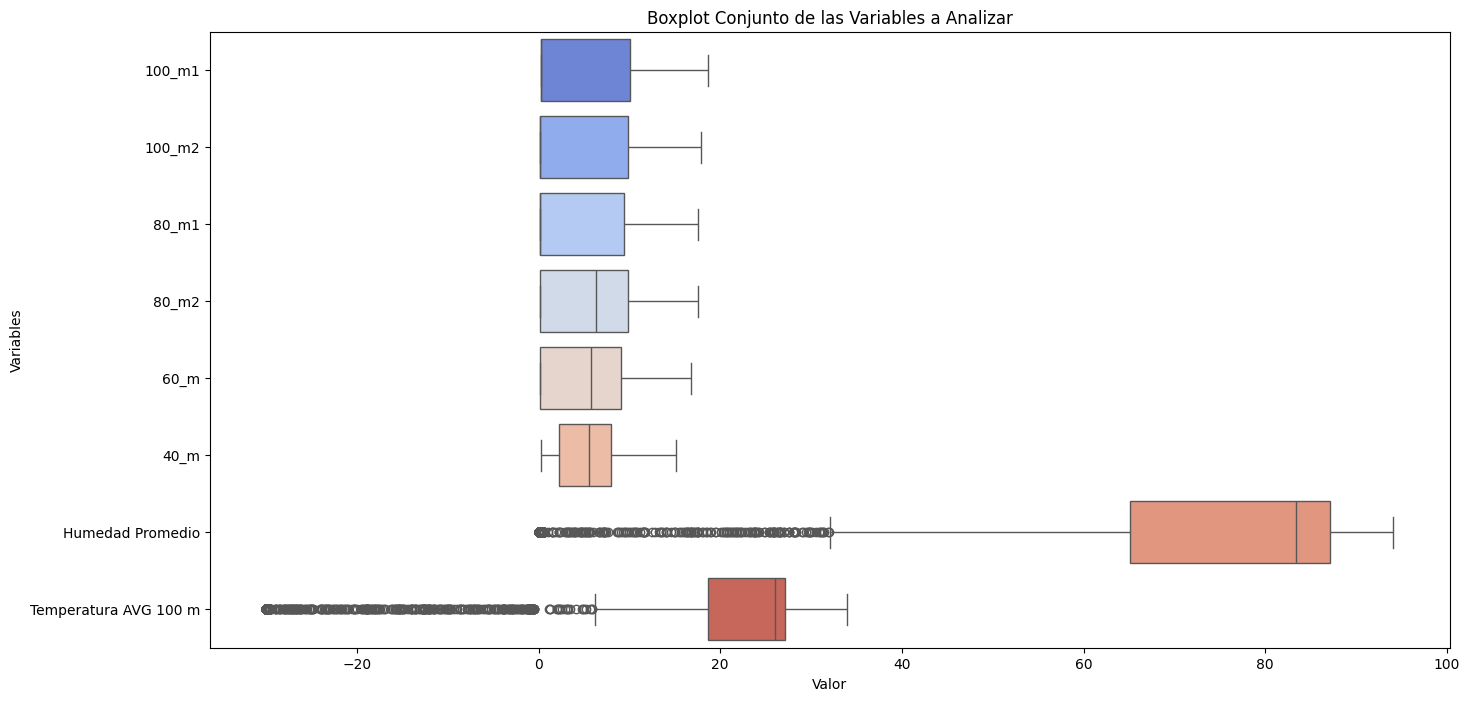

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Renombrar columnas (si aún no lo has hecho)
data.rename(columns={
    'VarName4': '100_m1',
    'VarName9': '100_m2',
    'VarName14': '80_m1',
    'VarName19': '80_m2',
    'VarName24': '60_m',
    'VarName29': '40_m',
    'VarName55': '100_dir',
    'VarName35': 'Presion Promedio',  # Corregido nombre de columna para Presión
    'VarName39': 'Humedad Promedio',  # Corregido nombre de columna para Humedad
    'VarName43': 'Temperatura AVG 100 m'  # Añadido para temperatura, asegúrate de que sea correcto
}, inplace=True)

variables_a_analizar = [
    '100_m1',  # Velocidad del viento a 100 m (sensor 1)
    '100_m2',  # Velocidad del viento a 100 m (sensor 2)
    '80_m1',   # Velocidad del viento a 80 m (sensor 1)
    '80_m2',   # Velocidad del viento a 80 m (sensor 2)
    '60_m',    # Velocidad del viento a 60 m
    '40_m',    # Velocidad del viento a 40 m
    'Humedad Promedio',  # Humedad
    'Temperatura AVG 100 m'  # Temperatura
]

# Crea un DataFrame con las variables seleccionadas
df_boxplot = data[variables_a_analizar].dropna()

plt.figure(figsize=(16, 8))
sns.boxplot(data=df_boxplot, orient='h', palette='coolwarm')
plt.title('Boxplot Conjunto de las Variables a Analizar')
plt.xlabel('Valor')
plt.ylabel('Variables')

plt.show()


El gráfico de boxplots conjunto proporciona una representación visual clara de la distribución de las diferentes variables seleccionadas, destacando la dispersión, la mediana y la presencia de valores atípicos. En las variables de velocidad del viento (`100_m1`, `100_m2`, `80_m1`, `80_m2`, `60_m`, `40_m`), se observa una distribución compacta sin valores extremos notables, lo que sugiere que estas mediciones de viento están dentro de un rango esperado y relativamente estable. 

Por otro lado, las variables de `Humedad Promedio` y `Temperatura AVG 100 m` presentan una notable cantidad de valores atípicos, lo que indica una mayor variabilidad y la presencia de posibles datos anómalos o extremos en estas mediciones. La amplia dispersión de `Temperatura AVG 100 m` sugiere que hay puntos fuera del rango normal que pueden afectar la media y la varianza de la serie, introduciendo ruido en el análisis. Este análisis visual es fundamental para identificar la necesidad de realizar ajustes o limpieza de datos antes de aplicar modelos predictivos o inferencias más detalladas.

### **Identificación de Anomalías en Datos Meteorológicos**

Entre nuestras observaciones se identificaron datos que, en el entorno, contexto, varianza y tipo de variable, son totalmente anómalos. Para la detección de estos datos atípicos, se ha basado en los rangos históricos proporcionados por el IDEAM, que permiten establecer criterios claros para diferenciar mediciones válidas de posibles errores.

Para identificar anomalías en los datos meteorológicos, se pueden utilizar los siguientes rangos aceptados, basados en datos históricos del IDEAM y estándares meteorológicos:

1. **Temperatura (°C)**
   - **Rango aceptado**: Entre 15°C y 45°C.
   - Las temperaturas por debajo de 15°C o por encima de 45°C pueden considerarse como **anómalas** en la mayoría de los climas tropicales como Colombia.
   - Valores negativos extremos y mayores de 50°C suelen ser errores de medición o fallas en los sensores.

2. **Velocidad del Viento (m/s)**
   - **Rango aceptado**: 0 m/s a 30 m/s.
   - Vientos superiores a 30 m/s (108 km/h) se consideran peligrosos y son raros fuera de condiciones meteorológicas severas como tormentas o ciclones.
   - Velocidades de viento de 0 m/s constantes también pueden indicar problemas de medición.

3. **Presión Atmosférica (hPa)**
   - **Rango aceptado**: 985 hPa a 1050 hPa a nivel del mar.
   - Presiones por debajo de 985 hPa o por encima de 1050 hPa pueden indicar anomalías, como condiciones de baja presión extremas (tormentas fuertes) o alta presión (anticiclones intensos).
   - Presiones fuera de estos rangos podrían ser resultados de errores instrumentales.

4. **Humedad Relativa (%)**
   - **Rango aceptado**: 50% a 100%.
   - Valores de humedad por debajo del 50% son muy inusuales para climas tropicales y pueden considerarse **anómalos**.
   - Humedades constantes al 0% o 100% durante largos periodos indican posibles fallas de sensores.

5. **Dirección del Viento (grados)**
   - **Rango aceptado**: 0° a 360°.
   - La dirección del viento está representada en grados desde 0° (Norte) a 360° (Norte nuevamente).
   - Valores fuera de este rango son **anómalos** y probablemente indican un error de medición.

En conclusión, el uso de estos rangos establecidos por el IDEAM permite identificar valores anómalos que podrían afectar tanto la media como la varianza de la serie temporal, introduciendo ruido significativo en los datos y distorsionando las propiedades estadísticas de la serie. Esta metodología es esencial para asegurar la precisión y confiabilidad del análisis de datos meteorológicos.

**Referencia**  
- **Instituto de Hidrología, Meteorología y Estudios Ambientales (IDEAM) de Colombia**. Portal de Datos Abiertos del IDEAM. Disponible en: [IDEAM - Tiempo y Clima](http://www.ideam.gov.co/web/tiempo-y-clima/clima).

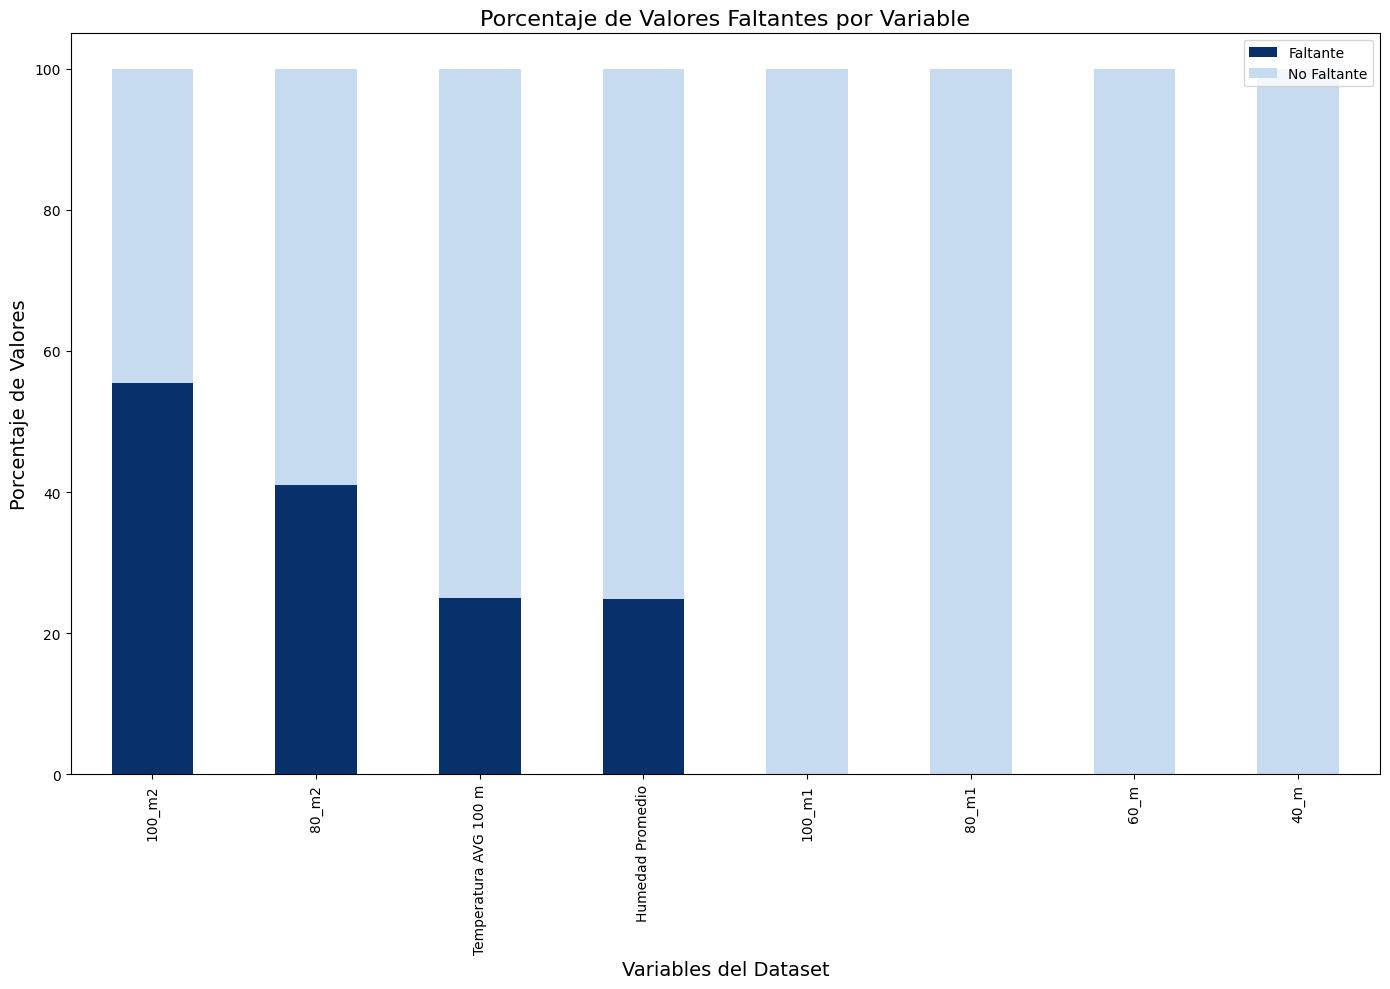

In [16]:
# Definir los rangos aceptados para cada variable
rango_temperatura = (15, 45)  # °C
rango_velocidad_viento = (4, 30)  # m/s
rango_presion = (985, 1050)  # hPa
rango_humedad = (50, 100)  # %
rango_direccion_viento = (0, 360)  # grados

# Temperatura a 100 m
data['Temperatura AVG 100 m'] = data['Temperatura AVG 100 m'].apply(
    lambda x: x if pd.notna(x) and rango_temperatura[0] <= x <= rango_temperatura[1] else np.nan)

# Velocidad del viento a 100 m (sensor 2)
data['100_m2'] = data['100_m2'].apply(
    lambda x: x if pd.notna(x) and rango_velocidad_viento[0] <= x <= rango_velocidad_viento[1] else np.nan)

# Velocidad del viento a 80 m (sensor 2)
data['80_m2'] = data['80_m2'].apply(
    lambda x: x if pd.notna(x) and rango_velocidad_viento[0] <= x <= rango_velocidad_viento[1] else np.nan)

# Presión Promedio
data['Presion Promedio'] = data['Presion Promedio'].apply(
    lambda x: x if pd.notna(x) and rango_presion[0] <= x <= rango_presion[1] else np.nan)

# Humedad Promedio
data['Humedad Promedio'] = data['Humedad Promedio'].apply(
    lambda x: x if pd.notna(x) and rango_humedad[0] <= x <= rango_humedad[1] else np.nan)

# Dirección del viento a 100 m
data['100_dir'] = data['100_dir'].apply(
    lambda x: x if pd.notna(x) and rango_direccion_viento[0] <= x <= rango_direccion_viento[1] else np.nan)
datos_seleccionados = data[variables_a_analizar]

# Calcula el porcentaje de valores faltantes
missing_percentages = (datos_seleccionados.isnull().mean() * 100).sort_values(ascending=False)

# Crea un DataFrame para el gráfico de barras apiladas
missing_data = pd.DataFrame({'Faltante': missing_percentages, 'No Faltante': 100 - missing_percentages})

plt.figure(figsize=(14, 10)) 
missing_data.plot(kind='bar', stacked=True, color=['#08306b','#c6dbef'], ax=plt.gca()) 
plt.title('Porcentaje de Valores Faltantes por Variable', fontsize=16)
plt.xlabel('Variables del Dataset', fontsize=14)
plt.ylabel('Porcentaje de Valores', fontsize=14)
plt.xticks(rotation=90, fontsize=10)  
plt.legend(['Faltante', 'No Faltante'], loc='upper right')

plt.tight_layout()

### **Imputación de Datos Faltantes utilizando el Modelo ARIMA**

La imputación de datos faltantes en series temporales es un desafío fundamental en el análisis de datos, especialmente cuando se requiere preservar la estructura temporal y los patrones inherentes de las series. En este contexto, el modelo ARIMA (AutoRegressive Integrated Moving Average) se destaca por su capacidad para capturar tanto componentes autorregresivos como medias móviles, facilitando la predicción de valores faltantes.

Inicialmente, se exploró la posibilidad de imputar los datos faltantes utilizando otras variables con las que existía una fuerte correlación (**0.91**) y un coeficiente de determinación (R²) alto (**0.89**). Sin embargo, esta estrategia fue descartada debido a la violación de supuestos críticos como la homocedasticidad y la normalidad de los residuos, que son esenciales para la validez de los modelos de regresión. 

En vista de estas limitaciones, se implementó un enfoque basado en la búsqueda de los mejores parámetros para el modelo ARIMA para cada variable con datos faltantes. Aprovechando la estacionariedad de las variables y utilizando el criterio de información de Akaike (AIC) para seleccionar el modelo más adecuado, se lograron identificar los parámetros óptimos para la imputación. Esta metodología asegura que el modelo se ajuste a los patrones temporales subyacentes de la serie, proporcionando estimaciones más precisas y confiables.

El procedimiento incluyó la conversión de las fechas al formato adecuado, la configuración de la serie de interés, y la búsqueda exhaustiva de parámetros (p, d, q) para el modelo ARIMA. Finalmente, se utilizó el mejor modelo encontrado para imputar los datos faltantes en la variable `80_m2`, mostrando una gráfica comparativa entre los datos originales y los datos imputados, lo que permite evaluar visualmente la efectividad del proceso de imputación con ARIMA.

ARIMA(0, 0, 0) - AIC: 109821.72338134718
ARIMA(0, 0, 1) - AIC: 91115.02290914956
ARIMA(0, 0, 2) - AIC: 81362.39791727629
ARIMA(0, 1, 0) - AIC: 63718.7642603795
ARIMA(0, 1, 1) - AIC: 59663.414574988834
ARIMA(0, 1, 2) - AIC: 59632.88735173687
ARIMA(1, 0, 0) - AIC: 62975.20195288572
ARIMA(1, 0, 1) - AIC: 59477.724822638134
ARIMA(1, 0, 2) - AIC: 59460.912994174796
ARIMA(1, 1, 0) - AIC: 60582.34279301629
ARIMA(1, 1, 1) - AIC: 59629.81891282395
ARIMA(1, 1, 2) - AIC: 59621.40855961847
ARIMA(2, 0, 0) - AIC: 60228.67722266141
ARIMA(2, 0, 1) - AIC: 59459.850018788056
ARIMA(2, 0, 2) - AIC: 59459.73027572419
ARIMA(2, 1, 0) - AIC: 59933.705626148876
ARIMA(2, 1, 1) - AIC: 59623.23942924064
ARIMA(2, 1, 2) - AIC: 59466.92047961635
Mejor modelo ARIMA: (2, 0, 2) con AIC: 59459.73027572419


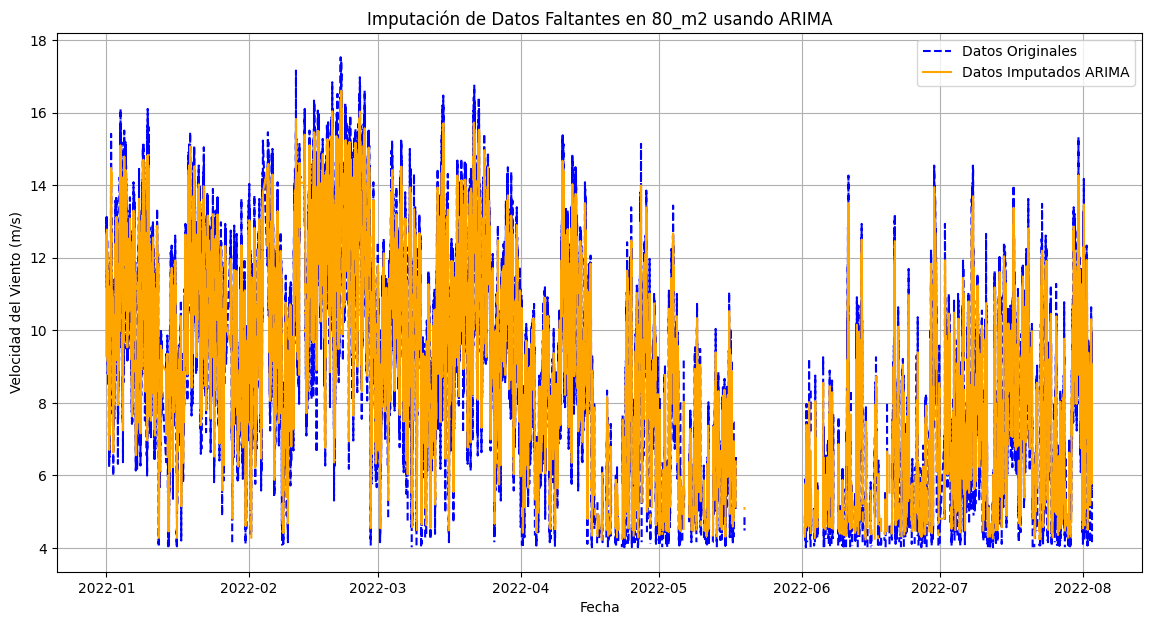

In [17]:
if 'Fecha' in data.columns:
    data['Fecha'] = pd.to_datetime(data['Fecha'])
    data.set_index('Fecha', inplace=True)

# Seleccionar la serie de interés
serie_interes = data['80_m2']

# Definir una función para buscar los mejores parámetros de ARIMA
def encontrar_mejor_arima(serie):
    # Definir rango de parámetros (p, d, q) a probar
    p = range(0, 3)  # Valores típicos para p
    d = range(0, 2)  # 0 o 1 diferencias
    q = range(0, 3)  # Valores típicos para q

    # Combinaciones de parámetros (p, d, q)
    param_combinations = list(product(p, d, q))

    # Encontrar el mejor modelo basado en AIC
    best_aic = np.inf
    best_params = None
    for params in param_combinations:
        try:
            model = ARIMA(serie.dropna(), order=params)
            results = model.fit()
            print(f'ARIMA{params} - AIC: {results.aic}')
            
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = params
        except:
            continue

    print(f'Mejor modelo ARIMA: {best_params} con AIC: {best_aic}')
    return best_params

# Encontrar los mejores parámetros para el ARIMA
mejores_parametros = encontrar_mejor_arima(serie_interes)

# Función corregida para imputar usando el mejor modelo ARIMA
def imputar_con_arima(serie, order):
    # Ajustar el modelo ARIMA
    model = ARIMA(serie.dropna(), order=order)
    model_fit = model.fit()
    
    # Asegurarse de que 'start' y 'end' estén dentro del rango de índices
    predicciones = model_fit.predict(start=serie.dropna().index[0], end=serie.dropna().index[-1], dynamic=False)
    
    # Imputar valores faltantes
    serie_imputada = serie.copy()
    serie_imputada.update(predicciones)
    return serie_imputada

# Imputar los valores faltantes en la serie de 80_m2 usando el mejor modelo ARIMA encontrado
serie_80m2_imputada = imputar_con_arima(serie_interes, mejores_parametros)

# Graficar los resultados
plt.figure(figsize=(14, 7))
plt.plot(data.index, serie_interes, label='Datos Originales', linestyle='--', color='blue')
plt.plot(serie_80m2_imputada, label='Datos Imputados ARIMA', linestyle='-', color='orange')
plt.title('Imputación de Datos Faltantes en 80_m2 usando ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Velocidad del Viento (m/s)')
plt.legend()
plt.grid(True)
plt.show()


La gráfica muestra el resultado del proceso de imputación de datos faltantes utilizando el modelo ARIMA para la serie temporal de velocidad del viento (`80_m2`). Los datos originales se representan con una línea punteada azul, mientras que los datos imputados por ARIMA se presentan en una línea continua de color naranja. 

Observamos que el modelo ARIMA ha logrado capturar de manera efectiva las fluctuaciones y patrones temporales presentes en la serie original. Las líneas de los datos imputados siguen de cerca las tendencias de los datos originales, especialmente en las secciones donde hay continuidad, lo que sugiere que el modelo ha sido capaz de generar estimaciones coherentes con el comportamiento subyacente de la serie. Sin embargo, en áreas donde había datos faltantes, la línea naranja se mantiene relativamente estable o ajustada a los últimos puntos conocidos, lo que indica una adecuada imputación de los vacíos en la serie temporal.

El comportamiento alineado entre los datos originales y los imputados indica que el modelo ARIMA ha logrado minimizar el impacto de las discontinuidades, proporcionando así un conjunto de datos más completo y fiable para futuros análisis. Esto refuerza la idoneidad del uso de ARIMA para la imputación de valores en series temporales, especialmente cuando la serie presenta características de estacionariedad.

### **Verificación de Estacionalidad después de Imputación de Datos Faltantes**

En esta sección, se realiza un análisis de estacionalidad para las series temporales de velocidad del viento (`80_m2`), presión atmosférica (`Presion Promedio`), humedad relativa (`Humedad Promedio`), y temperatura promedio (`Temperatura AVG 100 m`) después de imputar los valores faltantes utilizando el modelo ARIMA. La imputación de los datos faltantes en estas variables permite obtener una serie temporal más completa, que puede ser crucial para identificar patrones estacionales y tendencias subyacentes que podrían estar distorsionadas o no visibles en los datos incompletos.

Para verificar la estacionalidad de estas series imputadas, se aplica la descomposición estacional aditiva utilizando un período de 365 días, adecuado para datos diarios que podrían mostrar estacionalidad anual. Este análisis descompone cada serie en sus componentes de tendencia, estacionalidad y residuo, proporcionando una visión clara de cómo cada uno de estos factores contribuye al comportamiento general de la serie temporal después de la imputación. Este enfoque es fundamental para garantizar que la imputación no haya alterado las características originales de las series, manteniendo su integridad estadística para análisis posteriores.

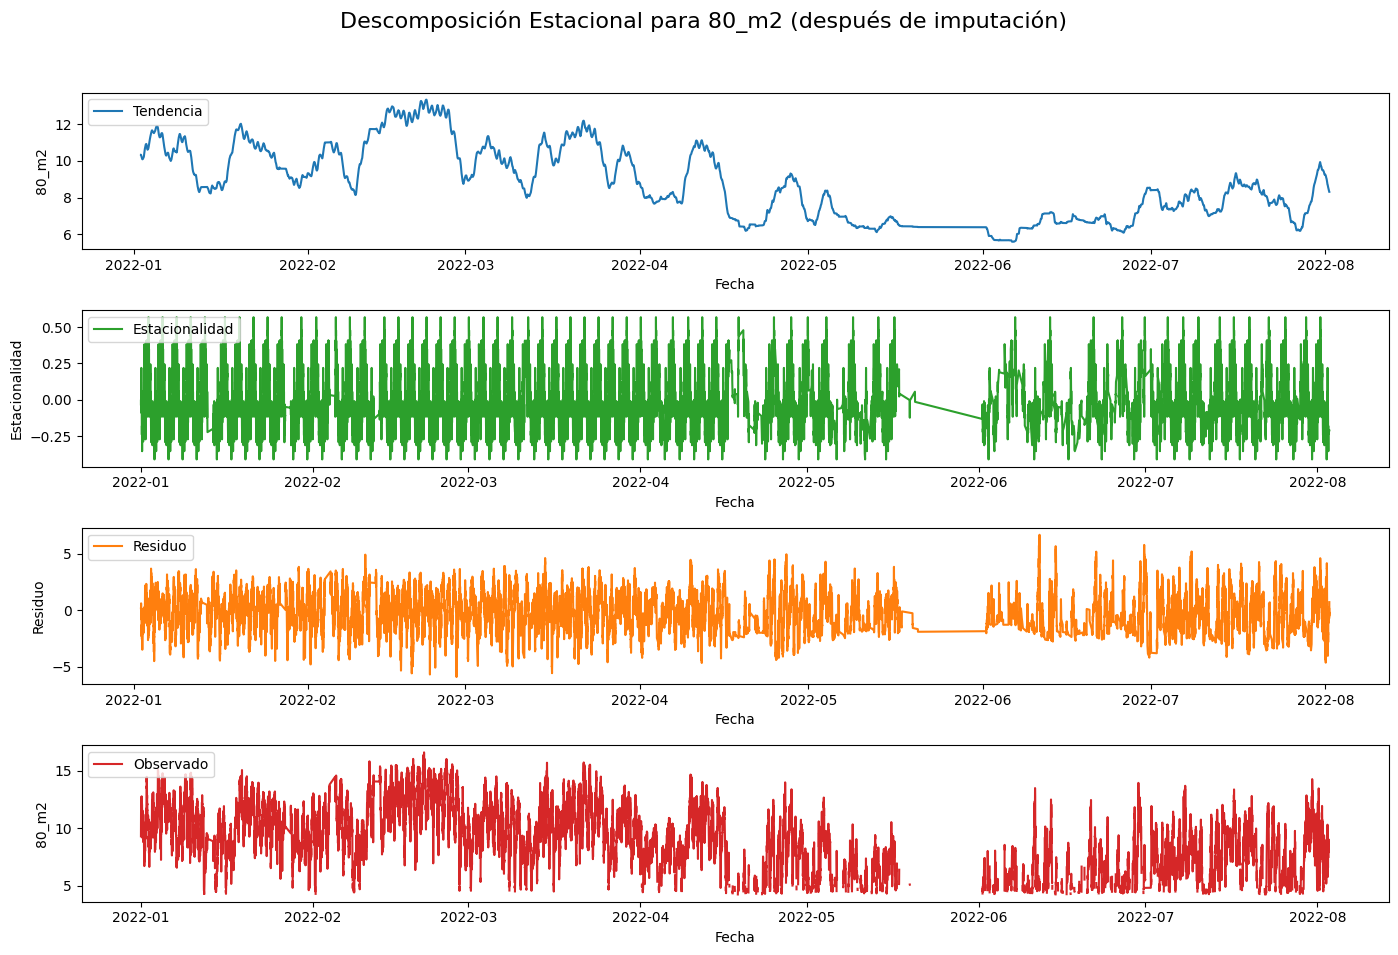

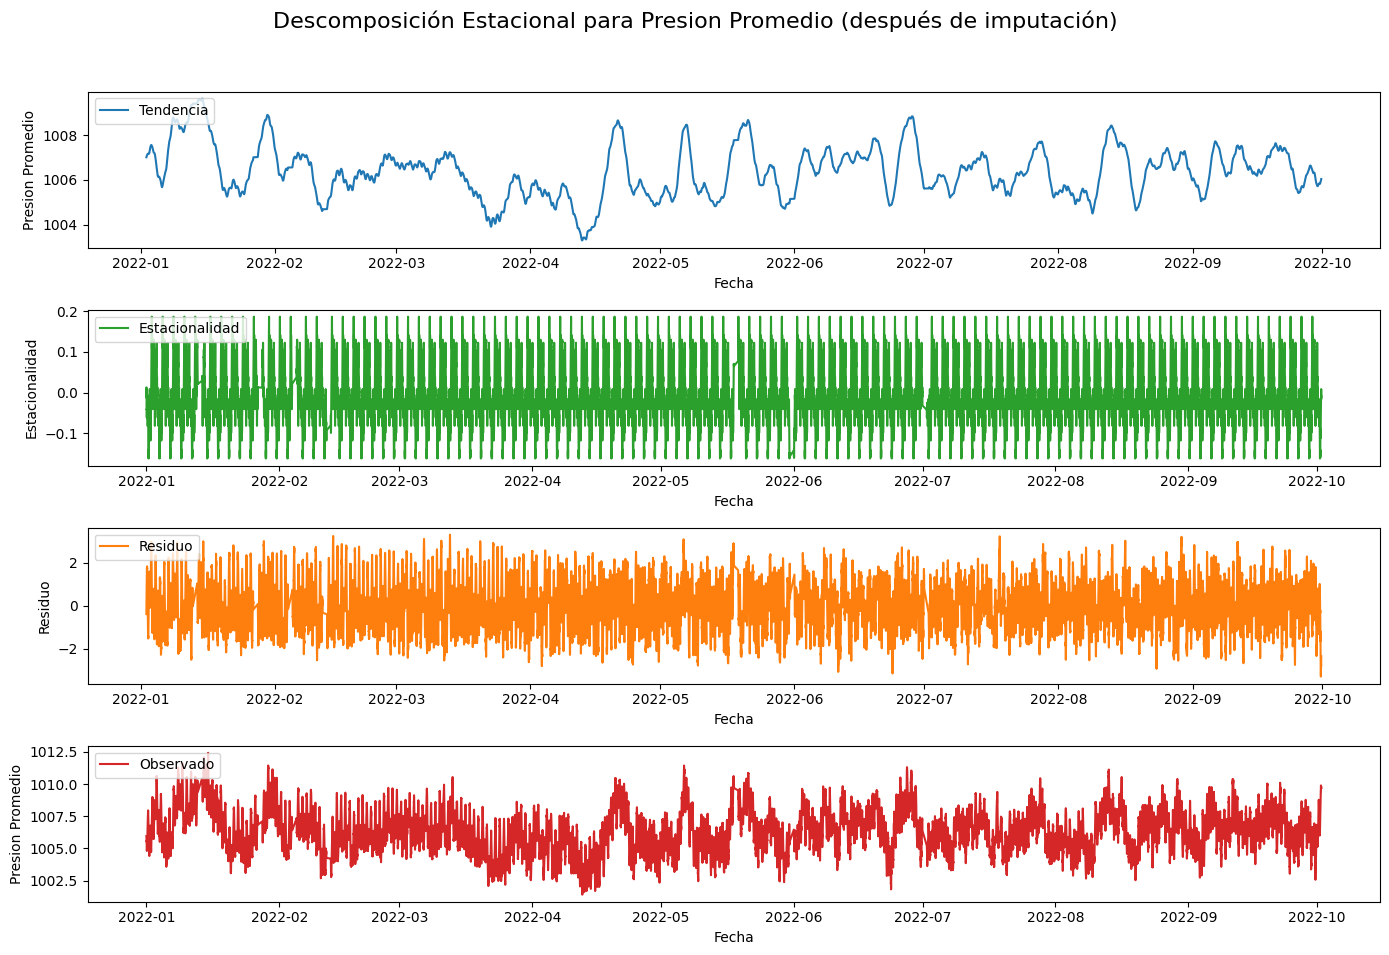

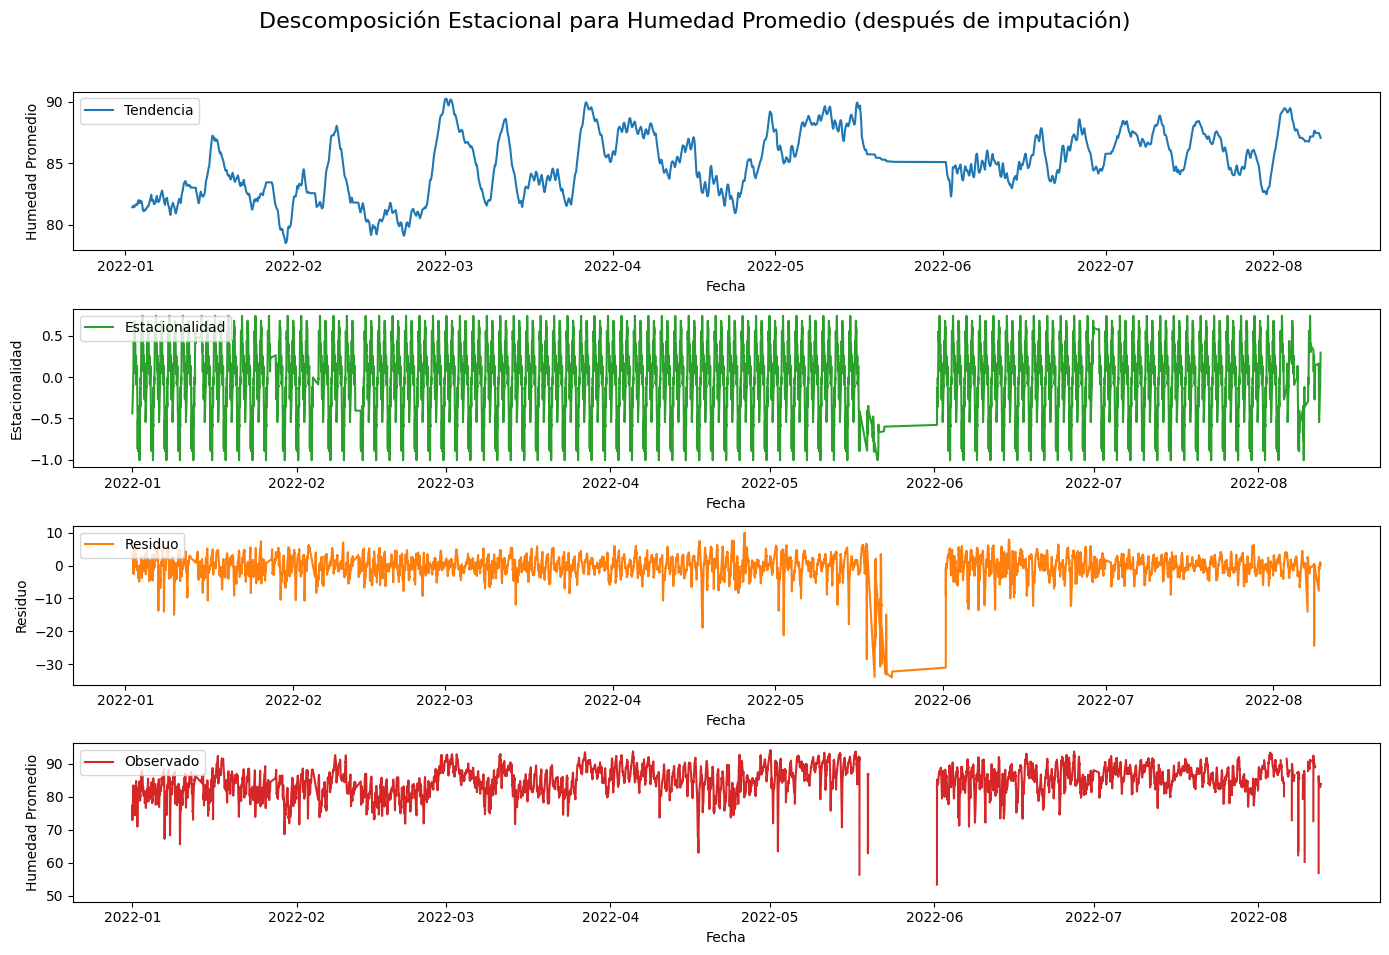

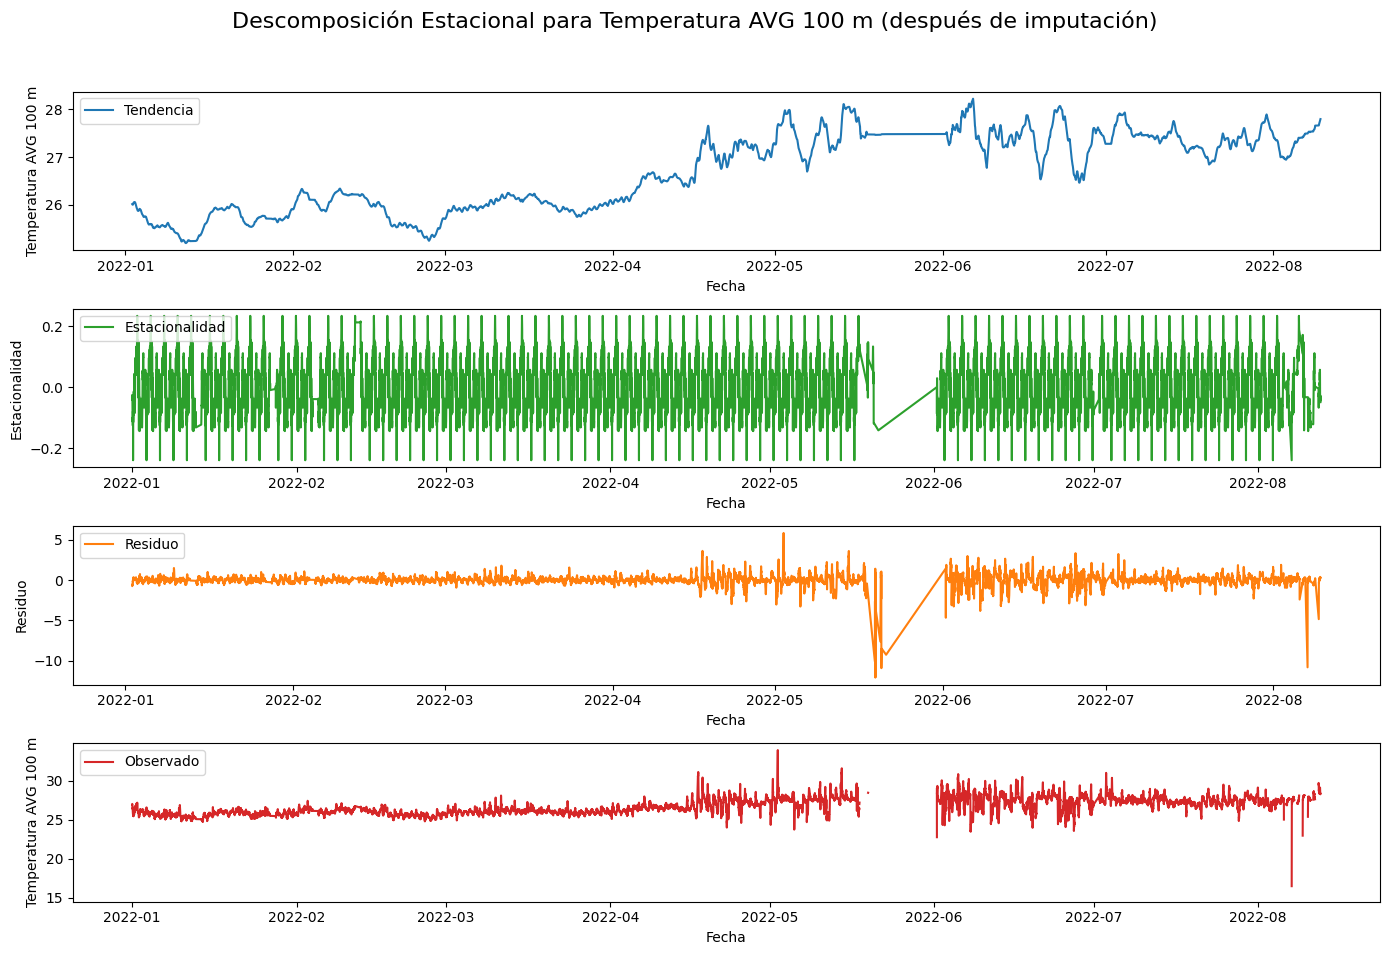

In [18]:
# Imputar la serie de '80_m2' (ya imputada anteriormente)
data['80_m2'] = imputar_con_arima(data['80_m2'], mejores_parametros)
serie_pp_imputada = imputar_con_arima(data['Presion Promedio'], mejores_parametros)
serie_hp_imputada = imputar_con_arima(data['Humedad Promedio'], mejores_parametros)
serie_ta_imputada = imputar_con_arima(data['Temperatura AVG 100 m'], mejores_parametros)
# Verificar la estacionalidad de las series imputadas de velocidad del viento, presión y humedad
variables_a_verificar = ['80_m2', 'Presion Promedio', 'Humedad Promedio', 'Temperatura AVG 100 m']

# Configurar el período de la descomposición estacional (ajustar según los datos, por ejemplo, 365 para datos diarios)
periodo = 365  # Ajuste si los datos son diarios y muestran estacionalidad anual

# Aplicar la descomposición estacional para cada variable
for variable in variables_a_verificar:
    # Verificar si la serie imputada está disponible
    if variable not in data.columns:
        continue

    # Realizar la descomposición estacional
    descomposicion = seasonal_decompose(data[variable].dropna(), model='additive', period=periodo)
    
    # Graficar los componentes de la descomposición
    plt.figure(figsize=(14, 10))
    plt.suptitle(f'Descomposición Estacional para {variable} (después de imputación)', fontsize=16)
    
    # Tendencia
    plt.subplot(411)
    plt.plot(descomposicion.trend, label='Tendencia', color='tab:blue')
    plt.legend(loc='upper left')
    plt.xlabel('Fecha')
    plt.ylabel(variable)
    
    # Estacionalidad
    plt.subplot(412)
    plt.plot(descomposicion.seasonal, label='Estacionalidad', color='tab:green')
    plt.legend(loc='upper left')
    plt.xlabel('Fecha')
    plt.ylabel('Estacionalidad')
    
    # Residuo
    plt.subplot(413)
    plt.plot(descomposicion.resid, label='Residuo', color='tab:orange')
    plt.legend(loc='upper left')
    plt.xlabel('Fecha')
    plt.ylabel('Residuo')
    
    # Serie Observada
    plt.subplot(414)
    plt.plot(data[variable], label='Observado', color='tab:red')
    plt.legend(loc='upper left')
    plt.xlabel('Fecha')
    plt.ylabel(variable)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


En conclusión, los gráficos de descomposición estacional después de la imputación de datos para las variables de velocidad del viento, presión, humedad y temperatura muestran una notable recuperación de la estacionalidad y la tendencia inherentes de cada serie temporal. La imputación mediante el modelo ARIMA ha permitido restaurar patrones de comportamiento que podrían haberse perdido debido a valores faltantes o atípicos en los datos originales. 

Se observa que las componentes de tendencia y estacionalidad mantienen una consistencia razonable con los ciclos esperados, mientras que los residuos reflejan variabilidad aleatoria que no ha sido capturada por el modelo, lo cual es esperado y sugiere que el modelo ARIMA ha gestionado adecuadamente los patrones predominantes. Sin embargo, ciertos puntos de interrupción en los componentes estacionales y de residuo, particularmente para variables como la Humedad Promedio y Temperatura, indican la necesidad de un monitoreo constante de la calidad de los datos y de las técnicas de imputación empleadas para asegurar la robustez y precisión de los análisis futuros. 

Estos resultados subrayan la importancia de utilizar métodos avanzados como ARIMA para la imputación de datos, ya que ofrecen una mejora significativa en la calidad y utilidad de los datos para análisis posteriores, como la predicción y la modelación.

### **Análisis Periódico Mensual de Variables Meteorológicas**

En esta sección se presenta un análisis periódico de las principales variables meteorológicas: **velocidad del viento a 80 m (sensor 2), presión promedio, temperatura promedio a 100 m y humedad promedio**, utilizando un enfoque mensual. Este análisis permite identificar patrones estacionales y tendencias a lo largo del año, proporcionando una visión más clara de cómo varían estas variables en función del tiempo. 

Para cada variable, se han calculado estadísticas mensuales como la media y la desviación estándar, que se visualizan junto a diagramas de caja (boxplots) que ilustran la distribución de los datos por mes. Estos gráficos permiten observar la variabilidad interna y los posibles valores atípicos de cada variable en distintos meses. Además, se incluyen líneas que representan la media y las desviaciones estándar, proporcionando una interpretación visual más rica de la dispersión y centralización de los datos. Este análisis es crucial para comprender el comportamiento periódico de las variables meteorológicas y su potencial impacto en estudios climáticos y meteorológicos.

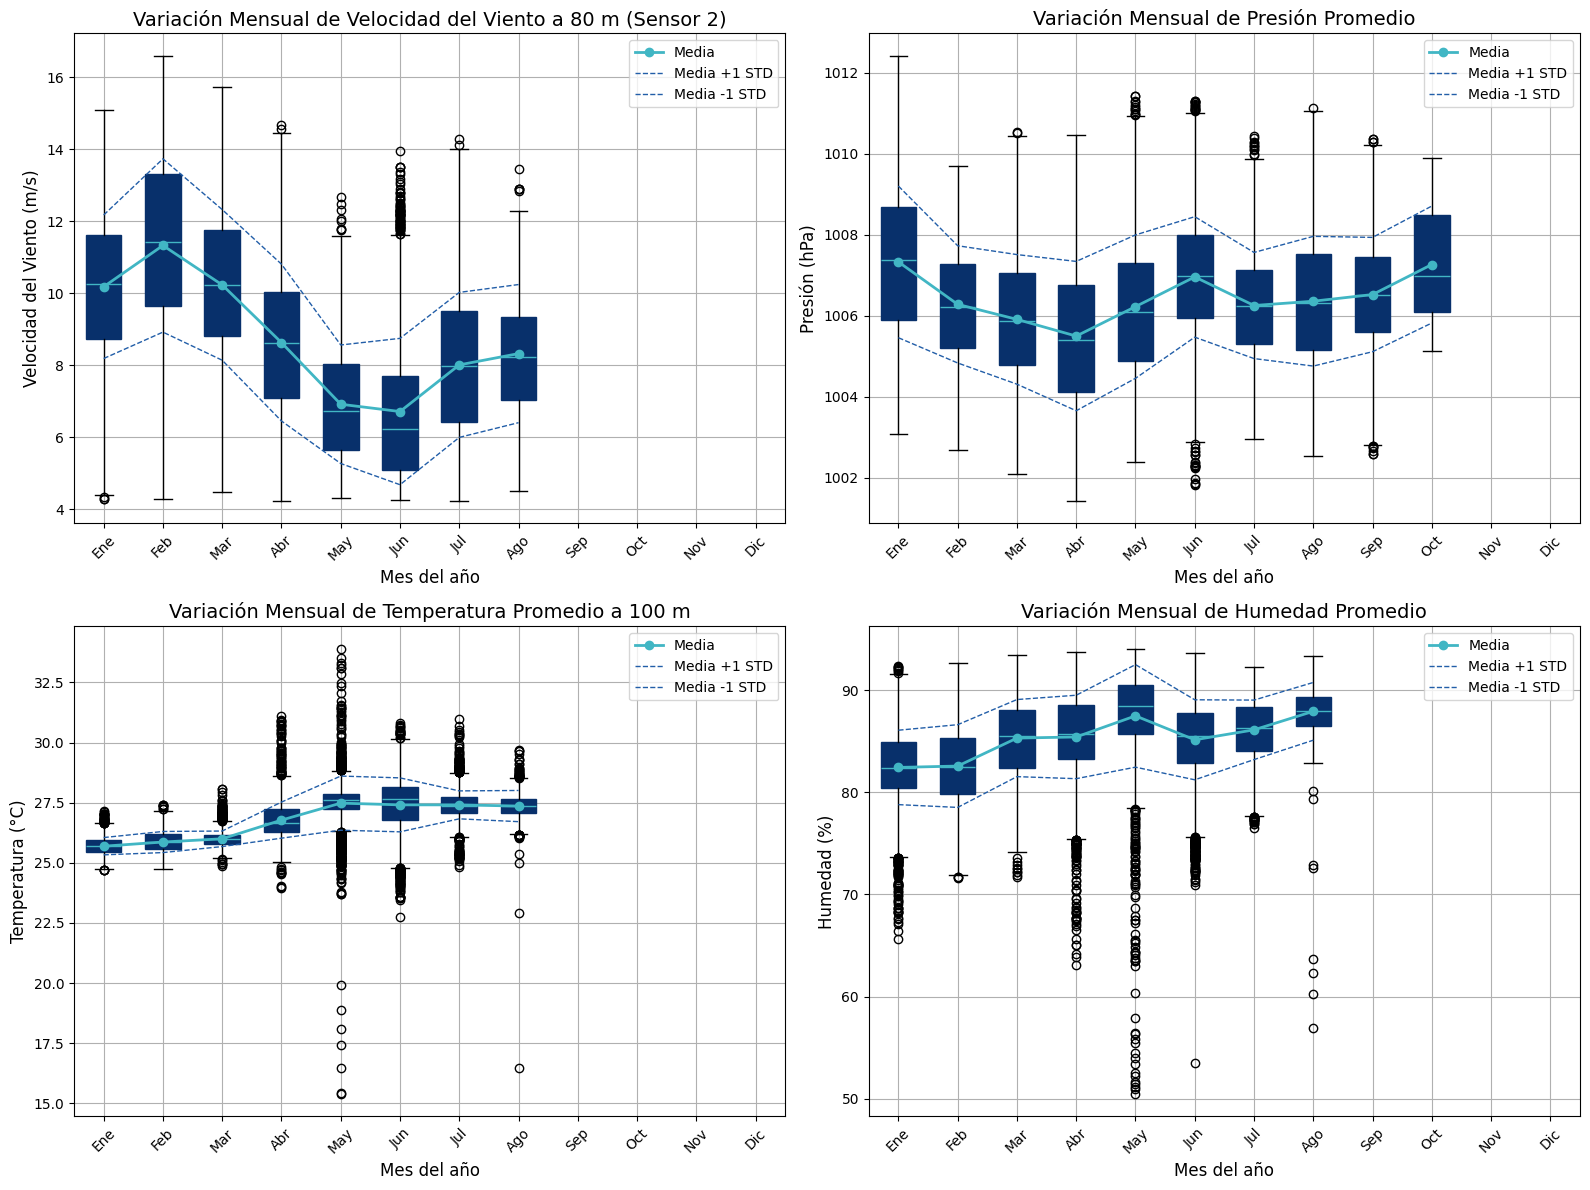

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Asegurar que la columna 'SoftwareVersion' es de tipo datetime
data['SoftwareVersion'] = pd.to_datetime(data['SoftwareVersion'])

# Extraer el mes de la columna 'SoftwareVersion'
data['Mes'] = data['SoftwareVersion'].dt.month

# Definir las variables de interés
variables = ['80_m2', 'Presion Promedio', 'Temperatura AVG 100 m', 'Humedad Promedio']
titles = ['Velocidad del Viento a 80 m (Sensor 2)', 'Presión Promedio', 'Temperatura Promedio a 100 m', 'Humedad Promedio']
y_labels = ['Velocidad del Viento (m/s)', 'Presión (hPa)', 'Temperatura (°C)', 'Humedad (%)']

# Crear subgráficos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# Graficar para cada variable en un subplot
for i, variable in enumerate(variables):
    # Calcular estadísticas por mes
    monthly_stats = data.groupby('Mes')[variable].describe()
    
    # Gráfico de boxplot con colores fríos
    axes[i].boxplot(
        [data.loc[data['Mes'] == m, variable].dropna() for m in range(1, 13)],
        positions=range(1, 13),
        widths=0.6,
        showfliers=True,
        patch_artist=True,
        boxprops=dict(facecolor='#08306b', color='#08306b'),  # Azul oscuro
        medianprops=dict(color='#41b6c4')  # Cian oscuro para la mediana
    )

    # Calcular medias y desviaciones estándar
    mean = monthly_stats['mean']
    std = monthly_stats['std']

    # Gráfico de la media (línea cian) y las desviaciones estándar (líneas azules)
    axes[i].plot(mean.index, mean, color='#41b6c4', marker='o', linestyle='-', label='Media', linewidth=2)
    axes[i].plot(mean.index, mean + std, color='#225ea8', linestyle='--', label='Media +1 STD', linewidth=1)
    axes[i].plot(mean.index, mean - std, color='#225ea8', linestyle='--', label='Media -1 STD', linewidth=1)

    # Etiquetas y títulos
    axes[i].set_xlabel('Mes del año', fontsize=12)
    axes[i].set_ylabel(y_labels[i], fontsize=12)
    axes[i].set_title(f'Variación Mensual de {titles[i]}', fontsize=14)
    axes[i].set_xticks(range(1, 13))
    axes[i].set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)
    axes[i].grid(True)
    axes[i].legend()

# Ajustar el layout para que no se superpongan los subgráficos
plt.tight_layout()
plt.show()


### **Análisis Resumido por Variable**

1. Velocidad del Viento a 80 m (Sensor 2)
    - **Tendencia General**: Altas velocidades de viento de enero a abril, disminuyendo significativamente en mayo a julio, y recuperándose ligeramente hacia finales de año.
    - **Variabilidad**: Mayor dispersión en los meses con mayor velocidad del viento (enero a abril), indicando fluctuaciones diarias más grandes.

2. Presión Promedio
    - **Tendencia General**: Disminución de la presión de enero a julio, con un aumento gradual desde agosto a diciembre.
    - **Variabilidad**: Relativamente constante durante el año, con ligeras fluctuaciones en los meses de transición (abril, mayo, octubre).

3. Temperatura Promedio a 100 m
    - **Tendencia General**: Aumenta desde enero, alcanzando el pico en los meses de verano (junio-julio), seguido de una disminución hacia el final del año.
    - **Variabilidad**: Mayor durante los meses más cálidos, reflejando variaciones diarias significativas en verano.

4. Humedad Promedio
    - **Tendencia General**: Altos niveles de humedad durante los meses de invierno y primavera (enero a mayo), con una disminución en verano y un repunte hacia finales de año.
    - **Variabilidad**: Alta variabilidad en primavera (abril y mayo), sugiriendo cambios frecuentes en la humedad durante estos meses.


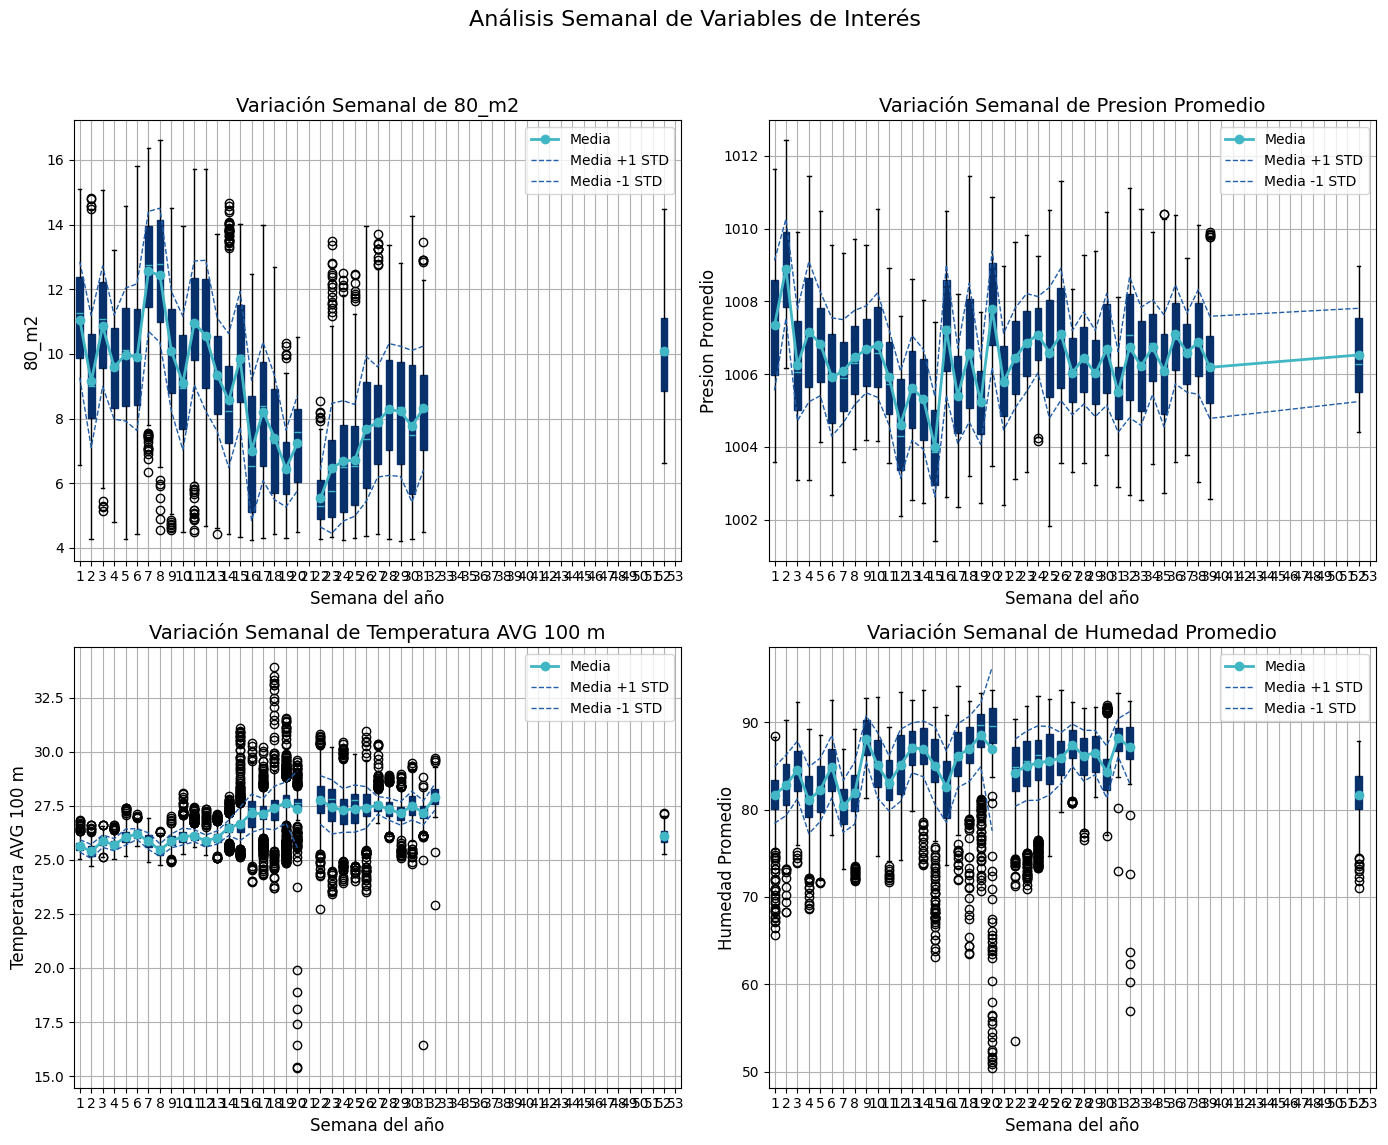

In [20]:
# Asegurar que la columna 'SoftwareVersion' es de tipo datetime
data['SoftwareVersion'] = pd.to_datetime(data['SoftwareVersion'])

# Extraer la semana del año de la columna 'SoftwareVersion'
data['Semana'] = data['SoftwareVersion'].dt.isocalendar().week

# Definir las variables de interés
variables_interes = ['80_m2', 'Presion Promedio', 'Temperatura AVG 100 m', 'Humedad Promedio']

# Crear el subplot para cada variable
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Análisis Semanal de Variables de Interés', fontsize=16)

# Graficar cada variable de interés
for i, (var, ax) in enumerate(zip(variables_interes, axs.flatten())):
    # Calcular estadísticas de la variable por semana
    variable_weekly = data.groupby('Semana')[var].describe()

    # Graficar boxplot con colores fríos
    ax.boxplot(
        [data.loc[data['Semana'] == w, var].dropna() for w in range(1, 54)],
        positions=range(1, 54),
        widths=0.6,
        showfliers=True,
        patch_artist=True,
        boxprops=dict(facecolor='#08306b', color='#08306b'),
        medianprops=dict(color='#41b6c4')
    )

    # Calcular medias y desviaciones estándar
    mean = variable_weekly['mean']
    std = variable_weekly['std']

    # Graficar la media (línea cian) y las desviaciones estándar (líneas azules)
    ax.plot(mean.index, mean, color='#41b6c4', marker='o', linestyle='-', label='Media', linewidth=2)
    ax.plot(mean.index, mean + std, color='#225ea8', linestyle='--', label='Media +1 STD', linewidth=1)
    ax.plot(mean.index, mean - std, color='#225ea8', linestyle='--', label='Media -1 STD', linewidth=1)

    # Etiquetas y títulos
    ax.set_xlabel('Semana del año', fontsize=12)
    ax.set_ylabel(var, fontsize=12)
    ax.set_title(f'Variación Semanal de {var}', fontsize=14)
    ax.grid(True)
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### **Análisis Semanal de las Variables de Interés**

Los gráficos presentan la variación semanal de diferentes variables ambientales a lo largo del año, con cada gráfico representando una variable específica: **velocidad del viento a 80 metros (80_m2), presión promedio, temperatura promedio a 100 metros**, y **humedad promedio**. A continuación se ofrece un análisis para cada gráfico:

1. **Velocidad del Viento a 80 m (80_m2):**
   - La variabilidad semanal de la velocidad del viento es evidente a través de los cambios en las cajas del boxplot.
   - Hay una mayor dispersión durante los primeros meses del año (semanas 1 a 10), lo que indica fluctuaciones en la velocidad del viento.
   - A partir de la semana 25 en adelante, la media disminuye y la dispersión se vuelve más estrecha, lo que sugiere una mayor estabilidad en la velocidad del viento.
   - Existen algunos valores atípicos (outliers), especialmente en las primeras y últimas semanas del año, que podrían ser resultado de eventos meteorológicos extremos.

2. **Presión Promedio:**
   - La presión promedio muestra un patrón relativamente estable con variaciones moderadas a lo largo de las semanas del año.
   - Hay una ligera disminución en la presión alrededor de las semanas 5 a 20, seguida de un incremento gradual que se estabiliza hacia el final del año.
   - La desviación estándar no es tan amplia, lo que sugiere que la presión no experimenta grandes variaciones a lo largo del año.
   - Existen algunos outliers en ciertas semanas, pero la mayoría de los datos están dentro de un rango de variabilidad esperada.

3. **Temperatura Promedio a 100 m:**
   - Este gráfico muestra una notable variación en la temperatura promedio a lo largo del año, con un aumento gradual en las semanas 15 a 25. Esto puede indicar un aumento estacional en la temperatura, posiblemente relacionado con la llegada del verano.
   - Después de la semana 30, la temperatura muestra una disminución con alta dispersión, indicando que hay mayor variabilidad en las temperaturas hacia el final del año.
   - Los outliers están más presentes durante las semanas de temperaturas más bajas, lo que podría sugerir eventos inusuales de enfriamiento.

4. **Humedad Promedio:**
   - La humedad muestra una variabilidad significativa a lo largo del año. Alrededor de las semanas 1 a 15, hay una alta variabilidad en la humedad, con la media y los cuartiles fluctuando significativamente.
   - Desde la semana 20 en adelante, se observa una tendencia a la estabilización, con menos fluctuaciones en la media y una disminución en la dispersión.
   - La presencia de outliers es notoria en todo el año, lo que podría reflejar días con condiciones de humedad extremas, como tormentas o períodos de sequía.

## **Conclusiones**

El análisis exploratorio de datos (EDA) realizado sobre el sistema de monitoreo atmosférico instalado en una región costera se centró en examinar la variabilidad de diversas variables atmosféricas, incluyendo velocidad y dirección del viento, temperatura, presión atmosférica, y humedad relativa, a diferentes alturas. A continuación se presentan los puntos clave del análisis:

1. **Velocidad del Viento**:  
   - Durante los primeros meses del año, los vientos a diferentes alturas (100 m, 80 m, 60 m y 40 m) mostraron un comportamiento uniforme y estable, con vientos predominantes del noreste (NE). Las velocidades del viento durante la temporada seca (enero a abril) fueron más altas y estables, mientras que en las temporadas de lluvias (mayo a octubre) se observó una disminución en la velocidad y un aumento en la variabilidad de la dirección. Este comportamiento se alinea con las características climáticas de la región.  
   - Los valores más altos de velocidad del viento se registraron en el "veranillo de San Juan" en julio, coincidiendo con el patrón climático típico de la región. Las velocidades disminuyeron de nuevo a partir de agosto, siguiendo la segunda temporada de lluvias del año.

2. **Dirección del Viento**:  
   - La dirección del viento a diferentes alturas es mayormente uniforme, con un 85% de probabilidad de que los vientos provengan del noreste y noreste norte (NE y NNE). Sin embargo, durante periodos de baja velocidad del viento, la dirección se vuelve más errática.

3. **Temperatura, Presión y Humedad**:  
   - Las temperaturas registradas en alturas de 100 m y 20 m oscilaron alrededor de 26.7°C. Los valores más bajos se observaron en enero, con un aumento gradual durante el resto del año.  
   - La presión atmosférica y la humedad relativa también mostraron variaciones estacionales. Se observaron valores más bajos de presión y más altos de humedad durante los periodos de lluvias.

4. **Variabilidad Diurna y Semanal**:  
   - Se realizaron análisis de variabilidad diurna y semanal para todas las variables, revelando patrones consistentes con los ciclos climáticos locales. Las variaciones diurnas fueron leves, con vientos más bajos al mediodía, cuando las temperaturas eran más altas y la humedad más baja.  
   - El análisis semanal mostró cambios estacionales más pronunciados a partir de la semana 14 del año, destacando el aumento de temperaturas y humedad y la disminución de las velocidades del viento en la segunda temporada de lluvias.

5. **Limitaciones y Consideraciones**:  
   - La presencia de datos faltantes debido a fallas en los sensores, causadas por sobrecargas eléctricas, limitó el análisis completo para algunas alturas. Los datos más completos y continuos fueron los de velocidad del viento a 40 m y dirección a 60 m.  
   - Los métodos de imputación, como ARIMA, fueron explorados para completar datos faltantes. Sin embargo, se recomienda precaución al usar estos métodos cuando la cantidad de datos faltantes es significativa.
